In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns=None

In [2]:
df = pd.read_csv(r"C:\Users\prate\Downloads\Micro-Credit-Project--1-\Micro Credit Project\Data file.csv")
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


### Preprocessing

In [3]:
df.isnull().sum().any()

False

In [4]:
df.duplicated().sum()

0

We do not have any Null Values or Duplicates in the dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [6]:
for i in df.columns:
    print(i,' :',len(df[i].value_counts()))
    print('*'*60)

Unnamed: 0  : 209593
************************************************************
label  : 2
************************************************************
msisdn  : 186243
************************************************************
aon  : 4507
************************************************************
daily_decr30  : 147025
************************************************************
daily_decr90  : 158669
************************************************************
rental30  : 132148
************************************************************
rental90  : 141033
************************************************************
last_rech_date_ma  : 1186
************************************************************
last_rech_date_da  : 1174
************************************************************
last_rech_amt_ma  : 70
************************************************************
cnt_ma_rech30  : 71
************************************************************
fr_ma_rech30  : 1083
*******

From above, we see that Unnamed: 0 is not useful as it's just the replication of the index,pdate's info is already available and pcircle is also not usefull as it contains just a single value. Hence we could delete these 3 columns.

In [7]:
df.drop(['pcircle','Unnamed: 0','pdate'],axis=1,inplace=True)

In [8]:
df.sample(3)

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
161344,1,90022I70373,501.0,1400.0,3116.50,1130.44,2068.57,34.0,0.0,1539,0,0.0,0.0,0.0,0.00,2,35,3078,1539.0,44.50,0.0,0.0,0,0,1,6,6.0,0.0,2.0,12,6,0.0,0.000000,9.500000
2061,1,33058I90583,953.0,8006.0,8260.84,2365.74,2905.74,4.0,0.0,1539,4,11.0,6156.0,1539.0,201.83,4,11,6156,1539.0,201.83,0.0,0.0,0,0,3,18,6.0,0.0,4.0,24,6,0.0,8.333333,8.333333
32721,1,07958I90844,297.0,14498.0,17517.89,9969.35,14153.63,10.0,0.0,3178,4,2.0,9335.0,2309.0,9.50,12,8,23968,1924.0,47.00,0.0,0.0,0,0,3,36,12.0,0.0,4.0,42,12,0.0,4.333333,4.333333


In [9]:
categorical = []
categorical_encoded = []
non_categorical = []
for i in df.dtypes.index:
    if df[i].dtypes == 'object':
        categorical.append(i)
    else:
        if len(df[i].unique()) < 30:
            categorical_encoded.append(i)
        else:
            non_categorical.append(i)

In [10]:
for i in categorical_encoded:
    print(i,' :',df[i].unique())
    print("*"*30)

label  : [0 1]
******************************
cnt_da_rech90  : [ 0  1  3  2  5  6  8  4 27  7  9 14 12 22 13 10 16 19 11 15 38 18 20 30
 28 25 17]
******************************
medianamnt_loans30  : [0.  1.  0.5 2.  1.5 3. ]
******************************
maxamnt_loans90  : [ 6 12  0]
******************************
medianamnt_loans90  : [0.  1.  0.5 2.  1.5 3. ]
******************************


In [11]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3851.927942,6.31543,7.716780,12396.218352,1864.595821,92.025541,262.578110,3749.494447,0.041495,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.374433,7.19347,12.590251,16857.793882,2081.680664,369.215658,4183.897978,53885.414979,0.397556,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.00000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.00000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240107,38.000000,64.000000,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


#### lable

In [12]:
df['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

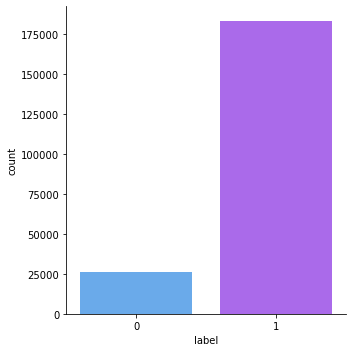

In [13]:
sns.catplot(x='label',data=df,kind='count',palette='cool')
plt.show()

In [14]:
print('% data with lable 1 :',(len(df[df['label']==1])/len(df))*100)
print('% data with lable 0 :',(len(df[df['label']==0])/len(df))*100)

% data with lable 1 : 87.5177129007171
% data with lable 0 : 12.482287099282896


We see that the data is highly imbalanced and would have to be balanced.

#### Mobile number of the User :msidn 

In [15]:
duplicate_phn_numbers = df[df['msisdn'].duplicated()]
duplicate_phn_numbers.head(5)

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
1902,1,09901I95206,138.0,900.000000,900.000000,434.78,434.78,0.0,0.0,0,0,0.0,0.0,0.0,0.00,0,0,0,0.0,0.00,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
2280,1,14791I90583,1659.0,124.754667,124.754667,813.45,813.45,1.0,0.0,4048,5,0.0,9612.0,2309.0,16.07,6,31,11332,2014.5,19.57,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,2.333333,2.333333
2395,1,70401I85339,1419.0,616.160000,619.100000,556.88,589.76,1.0,0.0,773,5,6.0,6160.0,1539.0,32.00,6,53,6933,1156.0,44.50,0.0,0.0,0,0,4,24,6.0,0.5,4.0,24,6,0.5,8.500000,8.500000
2909,1,40881I89238,108.0,96.616000,96.616000,674.83,674.83,48.0,0.0,11327,0,0.0,0.0,0.0,0.00,1,0,11327,11327.0,43.00,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
3674,1,41251I91190,363.0,8615.000000,8713.490000,498.81,2356.11,5.0,0.0,770,4,9.0,3849.0,770.0,27.50,10,2,12499,1539.0,28.00,0.0,0.0,0,0,4,24,6.0,0.0,8.0,48,6,0.0,4.666667,4.000000


In [16]:
len(df[df['msisdn'].duplicated()])

23350

In [17]:
df[df['msisdn']=='70401I85339']

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
1360,1,70401I85339,1409.0,38.22,38.22,427.44,427.44,4.0,0.0,1539,3,6.0,3848.0,1539.0,63.0,4,53,4621,1156.0,60.0,0.0,0.0,0,0,2,12,6.0,0.5,2.0,12,6,0.5,14.000000,14.000000
2395,1,70401I85339,1419.0,616.16,619.10,556.88,589.76,1.0,0.0,773,5,6.0,6160.0,1539.0,32.0,6,53,6933,1156.0,44.5,0.0,0.0,0,0,4,24,6.0,0.5,4.0,24,6,0.5,8.500000,8.500000
128527,1,70401I85339,1429.0,3520.28,3529.10,687.24,785.88,3.0,0.0,770,6,1.0,6933.0,1156.0,20.0,8,1,8476,773.0,44.5,0.0,0.0,0,0,6,36,6.0,0.5,6.0,36,6,0.5,6.166667,6.166667


From above, we see that there are multiple entries for a single phone number where in the data is for Indonesia and no 2 people can have 2 same number in 1 country. Having different data for a same number can lead to incorrect predictions we could drop all these numbers as we do not have a way to find which record for a perticular number is true

In [18]:
df.drop(duplicate_phn_numbers.index,axis=0,inplace=True)

In [19]:
len(df[df['msisdn'].duplicated()])

0

We could also drop msisdn as it is nothing but a unique representation of a customer for which we already have index column.

In [20]:
df.drop('msisdn',axis=1,inplace=True)

#### age on cellular network in days : aon

<AxesSubplot:ylabel='Frequency'>

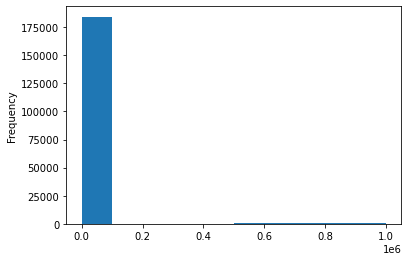

In [21]:
df['aon'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

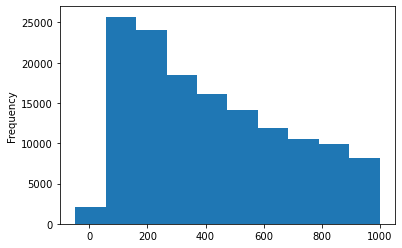

In [22]:
df['aon'][df['aon'] <1000].plot(kind='hist')

From above, we see the majority of the customers have been with telecom provider between 70-1000 days old.
We also see that there are a few records for aon as negitive, which cannot be possible.

In [23]:
df[df['aon'] <0].sample(4)

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
102592,0,-47.0,1.000000,1.000000,157.00,157.00,7.0,0.0,173,1,0.0,173.0,173.0,79.40,1,0,173,173.0,79.40,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.0,0.0
73120,1,-26.0,17.886333,17.886333,828.92,828.92,1.0,0.0,770,1,0.0,770.0,770.0,51.73,1,0,770,770.0,51.73,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.0,0.0
34048,1,-25.0,12.000000,12.000000,2825.04,2825.04,1.0,0.0,770,2,0.0,1540.0,770.0,64.00,2,0,1540,770.0,64.00,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,20.5,20.5
145931,0,-32.0,8.500000,8.500000,907.63,907.63,1.0,0.0,1539,1,0.0,1539.0,1539.0,9.00,1,0,1539,1539.0,9.00,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.0,0.0


In [24]:
len(df[df['aon'] <0])

1448

We cannot have age on cellular network to be less than 0 as if a person is not a customer how would// why would a company loan him?
Hence we could drop all the values which are negitive but that would lead to data loss hence we go ahead with median imputation of the data.

In [25]:
less_aon = df[df['aon']< 0]
less_aon = less_aon.index

In [26]:
for i in less_aon:
    df['aon'][i] = df['aon'].median()

In [27]:
df[df['aon'] >= 900000].sample(5)

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
4417,1,910990.614910,72.737333,72.737333,409.02,409.02,5.0,0.0,2309,2,13.0,6376.0,3188.0,302.00,3,36,10443,4067.0,355.00,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.0,0.000000
172040,1,901245.592395,14753.885000,14901.770000,3253.29,5607.09,4.0,0.0,4048,4,3.0,19670.0,4048.0,17.00,10,3,50200,4048.0,14.00,0.0,0.0,0,0,5,30,6.0,0.0,8.0,48,6,0.0,5.5,3.857143
173689,1,983965.097228,4638.598333,4666.590000,439.80,642.55,9.0,0.0,1539,3,6.0,3079.0,770.0,0.17,5,6,5399,773.0,0.17,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,9.5,9.500000
63083,1,937071.341090,50.400000,50.400000,513.28,513.28,3.0,0.0,773,2,10.0,8173.0,4086.5,249.00,2,10,8173,4086.5,249.00,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.0,0.000000
20421,0,964546.074043,97.980667,97.980667,-631.18,-631.18,13.0,0.0,8000,1,0.0,8000.0,8000.0,2.00,1,0,8000,8000.0,2.00,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.0,0.000000


According to http://www.gbgindonesia.com/en/services/article/2012/an_overview_of_indonesia_s_telecommunication_sector.php, the mobile connections were available to Indonesian  public from 1993 and this dataset was collected in 2016 but we see a few data points which show mobile users to be active for over 900000 days which is over 2400 years ago at which point in time mobile phones were definately not available. For this we assume the telecome services to be active in Indonesia for mass markets from 1993 and till 2016 it is about 23 years. In this we take this assumption and we could either drop all the data point which are greater than 25 years or 9125 days old but that would lead to dataloss hence, we go ahead with median imputation of the data above 25 years.

In [28]:
len(df[df['aon'] > 9125])

1866

In [29]:
high_aon = df[df['aon'] > 9125]
high_aon = high_aon.index

In [30]:
for i in high_aon:
    df['aon'][i] = df['aon'].median()

In [31]:
df.sample(4)

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
11483,1,131.0,13106.616667,13143.850000,3216.54,4014.74,1.0,0.0,2309,7,2.0,13083.0,1539.0,25.0,10,2,20993,1924.0,22.5,0.0,0.0,0,0,3,30,12.0,0.0,4.0,36,12,0.0,5.75,5.75
94177,1,134.0,6191.550000,6383.500000,-325.41,-687.64,9.0,0.0,3178,6,2.0,39274.0,6024.0,103.0,8,4,57274,8000.0,85.0,0.0,0.0,0,0,1,12,12.0,1.0,1.0,12,12,1.0,0.00,0.00
184857,1,743.0,44.083333,44.083333,926.21,926.21,3.0,0.0,1539,3,6.0,3079.0,770.0,48.7,4,50,3252,770.0,54.2,0.0,0.0,0,0,4,24,6.0,0.0,4.0,24,6,0.0,7.00,7.00
17641,0,143.0,280.809667,360.330000,3864.92,6872.22,40.0,0.0,4048,0,0.0,0.0,0.0,0.0,2,0,14048,7024.0,5052.0,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.00,0.00


#### Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah): daily_decr30

<AxesSubplot:ylabel='Frequency'>

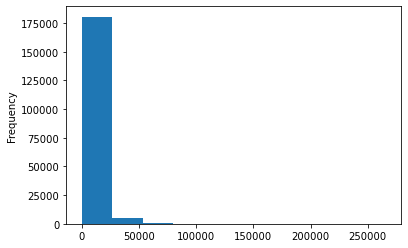

In [32]:
df['daily_decr30'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

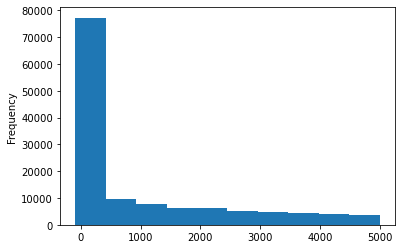

In [33]:
df['daily_decr30'][df['daily_decr30'] <5000].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

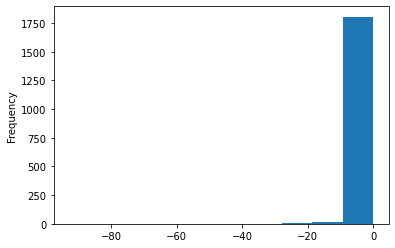

In [34]:
df['daily_decr30'][df['daily_decr30'] <0].plot(kind='hist')

We see that the Daily amount spent from main account cannot be a negitive number hence let's drop all the negative values

In [35]:
df= df[df['daily_decr30'] >= 0]

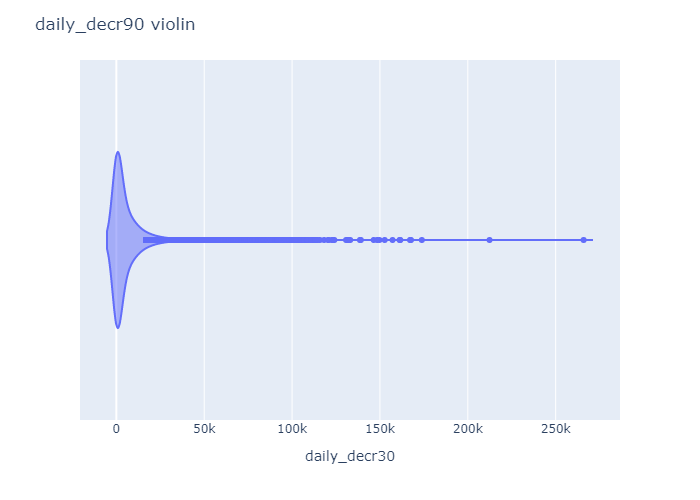

In [36]:
fig = px.violin(df, x='daily_decr30')
fig.update_layout(
    title='daily_decr90 violin', 
    xaxis = dict(
    ), 
    yaxis = dict(

    ), 
    paper_bgcolor='#FFFFFF', 
    showlegend=True
)
fig.show(renderer="png")

From above we see a large amount of outliers present.

#### Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah): daily_decr90

<AxesSubplot:ylabel='Frequency'>

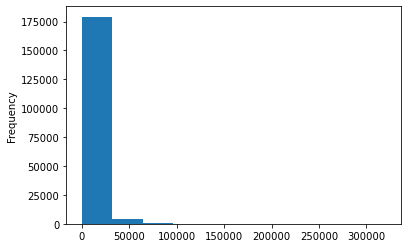

In [37]:
df['daily_decr90'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

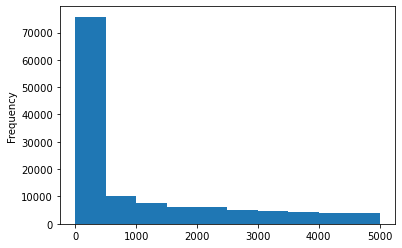

In [38]:
df['daily_decr30'][df['daily_decr30'] <5000].plot(kind='hist')

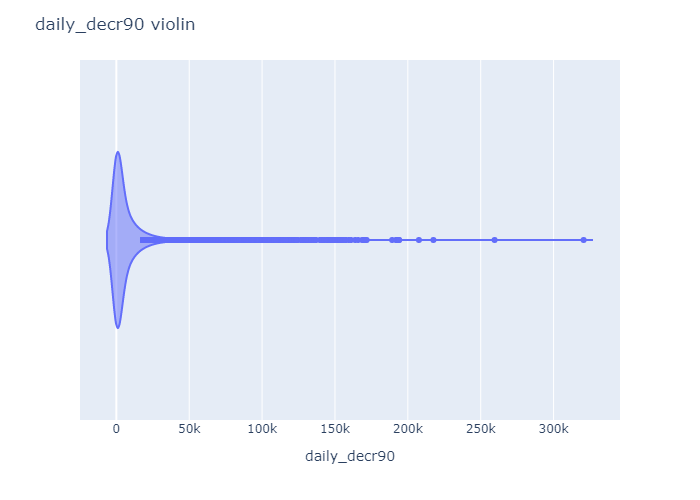

In [39]:
fig = px.violin(df, x='daily_decr90')
fig.update_layout(
    title='daily_decr90 violin', 
    xaxis = dict(
    ), 
    yaxis = dict(

    ), 
    paper_bgcolor='#FFFFFF', 
    showlegend=True
)
fig.show(renderer="png")

From above we see a large amount of outliers present and skewness too.

#### Average main account balance over last 30 days : rental30

<AxesSubplot:ylabel='Frequency'>

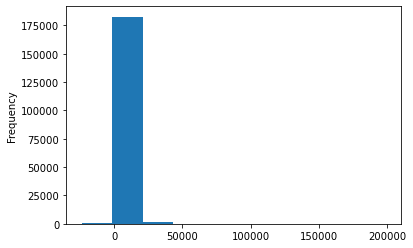

In [40]:
df['rental30'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

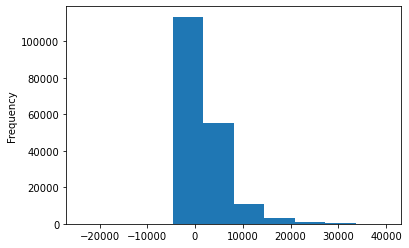

In [41]:
df['rental30'][df['rental30'] <40000].plot(kind='hist')

In [42]:
df['rental30'].describe()

count    184410.000000
mean       2650.863890
std        4301.755938
min      -23737.140000
25%         263.580000
50%        1043.480000
75%        3278.380000
max      198926.110000
Name: rental30, dtype: float64

let us convert rental 30 into columns based on the mount as follows

In [43]:
zero_bal = df[df['rental30']<=0].index

In [44]:
low_bal = df[df['rental30']>0 ]
low_bal = low_bal[low_bal['rental30']<269]
low_bal = low_bal.index

In [45]:
avg_bal = df[df['rental30']>268 ]
avg_bal = avg_bal[avg_bal['rental30']<3297]
avg_bal = avg_bal.index

In [46]:
high_bal = df[df['rental30']>3296]
high_bal = high_bal.index

In [47]:
for i in high_bal:
    df['rental30'][i] = 'good balance'

In [48]:
for i in avg_bal:
    df['rental30'][i] = 'average balance'

In [49]:
for i in low_bal:
    df['rental30'][i] = 'low balance'

In [50]:
for i in zero_bal:
    df['rental30'][i] = 'zero balance'

In [51]:
df['rental30'].value_counts()

average balance    92056
good balance       45859
low balance        34900
zero balance       11595
Name: rental30, dtype: int64

In [52]:
label_rental = pd.crosstab(df['label'],df['rental30']).apply(lambda x: x/x.sum() * 100)
label_rental = label_rental.transpose()
label_rental

label,0,1
rental30,,
average balance,11.544060,88.455940
good balance,10.017663,89.982337
low balance,16.455587,83.544413
zero balance,28.788271,71.211729


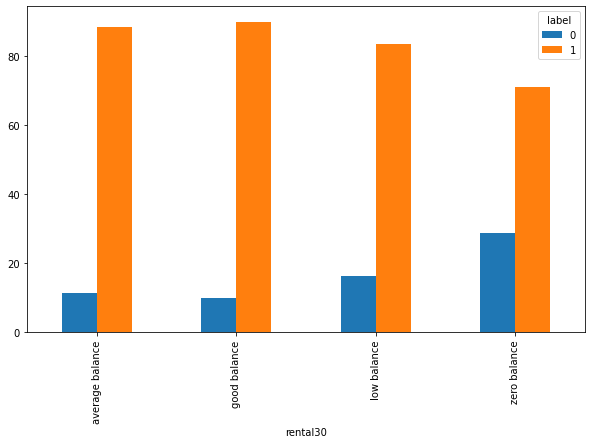

In [53]:
label_rental.plot(kind='bar',figsize=(10,6))
plt.show()

from above, we see that the people who maintain good and average balance have a higher chance of paying back the credit amount, wgere as peopele with zero balance defalut the payments the most.

#### Average main account balance over last 90 days : rental90

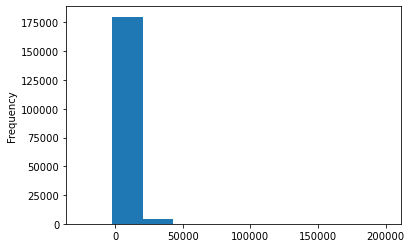

In [54]:
df['rental90'].plot(kind='hist')
plt.show()

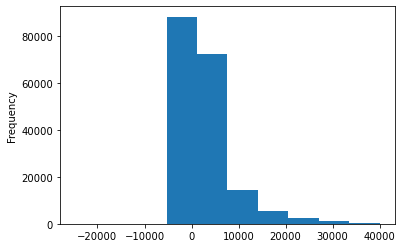

In [55]:
df['rental90'][df['rental90'] <40000].plot(kind='hist')
plt.show()

In [56]:
df['rental90'].describe()

count    184410.000000
mean       3425.351261
std        5737.914385
min      -24720.580000
25%         295.700000
50%        1295.830000
75%        4102.562500
max      200148.110000
Name: rental90, dtype: float64

In [57]:
zero_bal = df[df['rental90']<=0].index

In [58]:
low_bal = df[df['rental90']>0 ]
low_bal = low_bal[low_bal['rental90']<269]
low_bal = low_bal.index

In [59]:
avg_bal = df[df['rental90']>268 ]
avg_bal = avg_bal[avg_bal['rental90']<3297]
avg_bal = avg_bal.index

In [60]:
high_bal = df[df['rental90']>3296]
high_bal = high_bal.index

In [61]:
for i in high_bal:
    df['rental90'][i] = 'good balance'

In [62]:
for i in avg_bal:
    df['rental90'][i] = 'average balance'

In [63]:
for i in low_bal:
    df['rental90'][i] = 'low balance'

In [64]:
for i in zero_bal:
    df['rental90'][i] = 'zero balance'

In [65]:
df['rental90'].value_counts()

average balance    85279
good balance       55000
low balance        32900
zero balance       11231
Name: rental90, dtype: int64

In [66]:
label_rental = pd.crosstab(df['label'],df['rental30']).apply(lambda x: x/x.sum() * 100)
label_rental = label_rental.transpose()
label_rental

label,0,1
rental30,,
average balance,11.544060,88.455940
good balance,10.017663,89.982337
low balance,16.455587,83.544413
zero balance,28.788271,71.211729


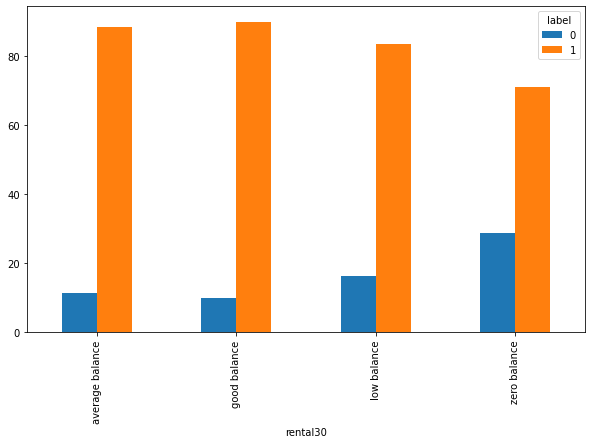

In [67]:
label_rental.plot(kind='bar',figsize=(10,6))
plt.show()

We see a similar trend where the people with zero or low balance, tend to default the payments the most and people with good balance the least.

#### Number of days till last recharge of main account : last_rech_date_ma

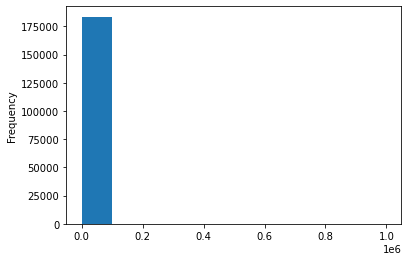

In [68]:
df['last_rech_date_ma'].plot(kind='hist')
plt.show()

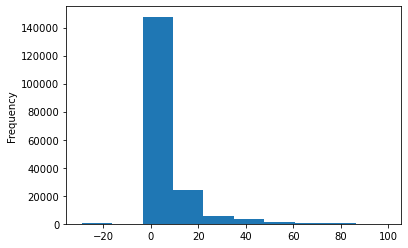

In [69]:
df['last_rech_date_ma'][df['last_rech_date_ma']<100].plot(kind='hist')
plt.show()

In [70]:
len(df[df['last_rech_date_ma']>9125])

916

From above, we see that the days till last recharge has some values which is logically not possible eg. more than 25 years. Hence we could drop them but dropping them would lead to data loss hence we go ahead with median imputation.

In [71]:
high_last_rech_date_ma = df[df['last_rech_date_ma']>9125]
high_last_rech_date_ma = high_last_rech_date_ma.index

In [72]:
for i in high_last_rech_date_ma:
    df['last_rech_date_ma'][i] = df['last_rech_date_ma'].median()

In [73]:
df['last_rech_date_ma'].describe()

count    184410.000000
mean          6.247167
std           9.875423
min         -29.000000
25%           1.000000
50%           3.000000
75%           7.000000
max         113.000000
Name: last_rech_date_ma, dtype: float64

In [74]:
expired_week = df[df['last_rech_date_ma']<0]
expired_week = expired_week[expired_week['last_rech_date_ma']>= -7]
expired_week = expired_week.index

In [75]:
expired_fortnight = df[df['last_rech_date_ma']<-7]
expired_fortnight = expired_fortnight[expired_fortnight['last_rech_date_ma']>=-14]
expired_fortnight = expired_fortnight.index

In [76]:
expired_month = df[df['last_rech_date_ma']<-14]
expired_month = expired_month.index

In [77]:
week = df[df['last_rech_date_ma'] <= 7]
week = week[week['last_rech_date_ma']>=0]
week = week.index

In [78]:
fortnight = df[df['last_rech_date_ma'] <=14]
fortnight = fortnight[fortnight['last_rech_date_ma']>7]
fortnight = fortnight.index

In [79]:
month = df[df['last_rech_date_ma']>14]
month = month[month['last_rech_date_ma']<=30]
month=month.index

In [80]:
quarter = df[df['last_rech_date_ma']>30]
quarter = quarter[quarter['last_rech_date_ma']<=90]
quarter = quarter.index

In [81]:
more = df[df['last_rech_date_ma']>90].index

In [82]:
for i in week:
    df['last_rech_date_ma'][i] = 'less than a week'

In [83]:
for i in fortnight:
    df['last_rech_date_ma'][i] = 'less than a fortnight'

In [84]:
for i in month:
    df['last_rech_date_ma'][i] = 'less than a month'

In [85]:
for i in quarter:
    df['last_rech_date_ma'][i] = 'less than a quarter'

In [86]:
for i in more:
    df['last_rech_date_ma'][i] = 'more than a quarter'

In [87]:
for i in expired_week:
    df['last_rech_date_ma'][i] = 'expired_week'

In [88]:
for i in expired_fortnight:
    df['last_rech_date_ma'][i] = 'expired_fortnight'

In [89]:
for i in expired_month:
    df['last_rech_date_ma'][i] = 'expired_month'

In [90]:
label_last_rech_date_ma = pd.crosstab(df['label'],df['last_rech_date_ma']).apply(lambda x: x/x.sum() * 100)
label_last_rech_date_ma = label_last_rech_date_ma.transpose()
label_last_rech_date_ma

label,0,1
last_rech_date_ma,,
expired_fortnight,0.000000,100.000000
expired_month,0.751073,99.248927
expired_week,1.000000,99.000000
less than a fortnight,13.339872,86.660128
less than a month,21.056440,78.943560
less than a quarter,27.711942,72.288058
less than a week,11.777971,88.222029
more than a quarter,0.000000,100.000000


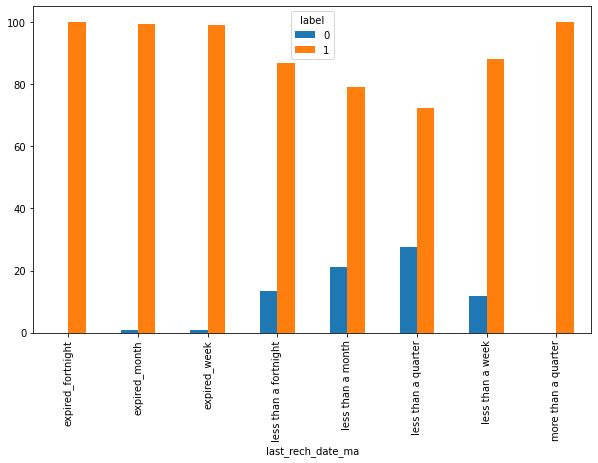

In [91]:
label_last_rech_date_ma.plot(kind='bar',figsize=(10,6))
plt.show()

From above we see customers whose accounts accounts are expiring between a week to a quarter are the once who default the payments the most.

#### Number of days till last recharge of data account : last_rech_date_da

In [92]:
df['last_rech_date_da'].describe()

count    184410.000000
mean       3749.499225
std       53677.529708
min         -29.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      999171.809410
Name: last_rech_date_da, dtype: float64

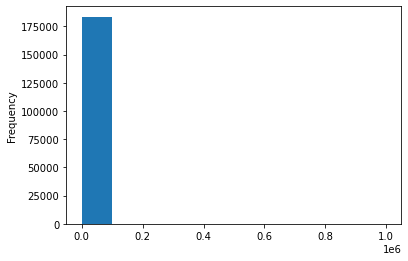

In [93]:
df['last_rech_date_da'].plot(kind='hist')
plt.show()

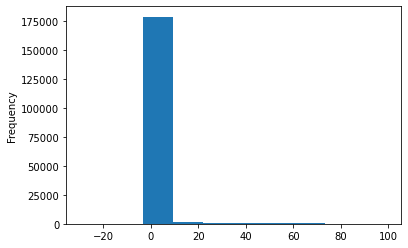

In [94]:
df['last_rech_date_da'][df['last_rech_date_da']<100].plot(kind='hist')
plt.show()

In [95]:
len(df[df['last_rech_date_da']>9125])

929

#### From above, we see that the days till last recharge has some values which is logically not possible more than 25 years. Hence we could drop them or some kind of imputation to avoid the data loss, we go ahead with the median imputation.

In [96]:
high_last_rech_date_da = df[df['last_rech_date_da']>9125]
high_last_rech_date_da = high_last_rech_date_da.index

In [97]:
for i in high_last_rech_date_da:
    df['last_rech_date_da'][i] = df['last_rech_date_da'].median()

In [98]:
expired_week = df[df['last_rech_date_da']<0]
expired_week = expired_week[expired_week['last_rech_date_da']>= -7]
expired_week = expired_week.index

In [99]:
expired_fortnight = df[df['last_rech_date_da']<-7]
expired_fortnight = expired_fortnight[expired_fortnight['last_rech_date_da']>=-14]
expired_fortnight = expired_fortnight.index

In [100]:
expired_month = df[df['last_rech_date_da']<-14]
expired_month = expired_month.index

In [101]:
week = df[df['last_rech_date_da'] <= 7]
week = week[week['last_rech_date_da']>=0]
week = week.index

In [102]:
fortnight = df[df['last_rech_date_da'] <=14]
fortnight = fortnight[fortnight['last_rech_date_da']>7]
fortnight = fortnight.index

In [103]:
month = df[df['last_rech_date_da']>14]
month = month[month['last_rech_date_da']<=30]
month=month.index

In [104]:
quarter = df[df['last_rech_date_da']>30]
quarter = quarter[quarter['last_rech_date_da']<=90]
quarter = quarter.index

In [105]:
more = df[df['last_rech_date_da']>90].index

In [106]:
for i in week:
    df['last_rech_date_da'][i] = 'less than a week'

In [107]:
for i in fortnight:
    df['last_rech_date_da'][i] = 'less than a fortnight'

In [108]:
for i in month:
    df['last_rech_date_da'][i] = 'less than a month'

In [109]:
for i in quarter:
    df['last_rech_date_da'][i] = 'less than a quarter'

In [110]:
for i in more:
    df['last_rech_date_da'][i] = 'more than a quarter'

In [111]:
for i in expired_week:
    df['last_rech_date_da'][i] = 'expired_week'

In [112]:
for i in expired_fortnight:
    df['last_rech_date_da'][i] = 'expired_fortnight'

In [113]:
for i in expired_month:
    df['last_rech_date_da'][i] = 'expired_month'

In [114]:
label_last_rech_date_da = pd.crosstab(df['label'],df['last_rech_date_da']).apply(lambda x: x/x.sum() * 100)
label_last_rech_date_da = label_last_rech_date_da.transpose()
label_last_rech_date_da

label,0,1
last_rech_date_da,,
expired_fortnight,0.000000,100.000000
expired_month,0.000000,100.000000
expired_week,0.000000,100.000000
less than a fortnight,11.162791,88.837209
less than a month,12.403644,87.596356
less than a quarter,7.146353,92.853647
less than a week,13.287009,86.712991
more than a quarter,0.000000,100.000000


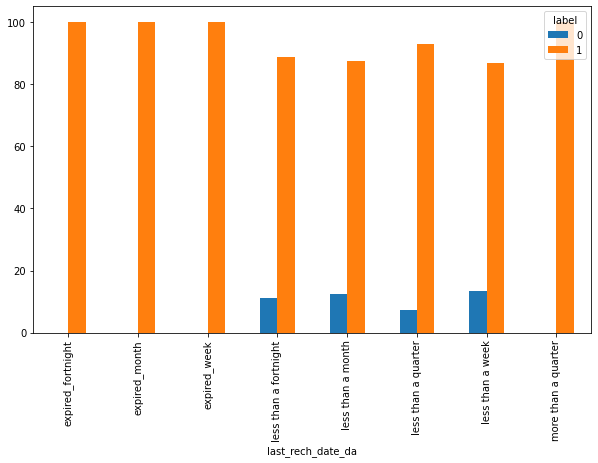

In [115]:
label_last_rech_date_da.plot(kind='bar',figsize=(10,6))
plt.show()

We see a similar trend as we saw in last_rech_date_ma.

#### Number of loans taken by user in last 30 days : cnt_loans30

In [116]:
df['cnt_loans30'].describe()

count    184410.000000
mean          2.529554
std           2.272920
min           0.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          38.000000
Name: cnt_loans30, dtype: float64

let's categorize the loan taken in 30 days.

In [117]:
no_loan30 = df[df['cnt_loans30']==0].index 

In [118]:
low_loan30 = df[df['cnt_loans30']>0]
low_loan30 = low_loan30[low_loan30['cnt_loans30']<=1]
low_loan30 = low_loan30.index

In [119]:
medium_loan30 = df[df['cnt_loans30']>=2]
medium_loan30 = medium_loan30[medium_loan30['cnt_loans30']<=4]
medium_loan30 = medium_loan30.index

In [120]:
high_loan30 = df[df['cnt_loans30']>=4]
high_loan30 = high_loan30[high_loan30['cnt_loans30']<=12]
high_loan30 = high_loan30.index

In [121]:
very_high_loan30 = df[df['cnt_loans30']>=13]
very_high_loan30 = very_high_loan30.index

In [122]:
for i in no_loan30:
    df['cnt_loans30'][i] = 'no loan'

In [123]:
for i in low_loan30:
    df['cnt_loans30'][i] = 'low loan'

In [124]:
for i in medium_loan30:
    df['cnt_loans30'][i] = 'medium loan'

In [125]:
for i in high_loan30:
    df['cnt_loans30'][i] = 'high loan'

In [126]:
for i in very_high_loan30:
    df['cnt_loans30'][i] = 'very high loan'

In [127]:
df['cnt_loans30'].value_counts()

low loan          78206
medium loan       62363
high loan         39545
no loan            3188
very high loan     1108
Name: cnt_loans30, dtype: int64

In [128]:
label_loans30 = pd.crosstab(df['label'],df['cnt_loans30']).apply(lambda x: x/x.sum() * 100)
label_loans30 = label_loans30.transpose()
label_loans30

label,0,1
cnt_loans30,,
high loan,2.508535,97.491465
low loan,23.587704,76.412296
medium loan,7.773840,92.226160
no loan,0.000000,100.000000
very high loan,1.353791,98.646209


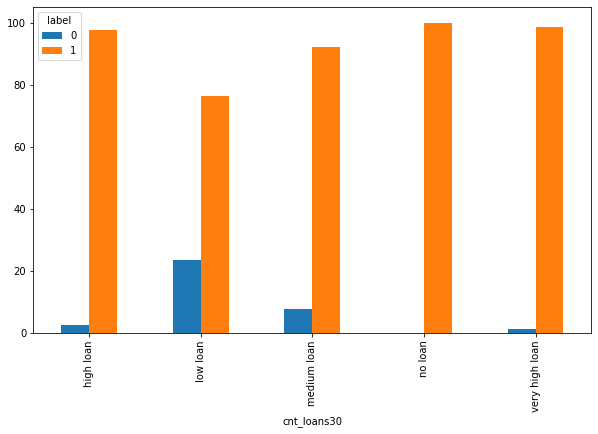

In [129]:
label_loans30.plot(kind='bar',figsize=(10,6))
plt.show()

from above we see that people with low loans tend to default the payments the most.

#### Number of loans taken by user in last 90 days : cnt_loans90

In [130]:
df['cnt_loans90'].describe()

count    184410.000000
mean         17.962559
std         223.544807
min           0.000000
25%           1.000000
50%           2.000000
75%           4.000000
max        4997.517944
Name: cnt_loans90, dtype: float64

In [131]:
no_loan90 = df[df['cnt_loans90']==0].index 

In [132]:
low_loan90 = df[df['cnt_loans90']>0]
low_loan90 = low_loan90[low_loan90['cnt_loans90']<=1]
low_loan90 = low_loan90.index

In [133]:
medium_loan90 = df[df['cnt_loans90']>=2]
medium_loan90 = medium_loan90[medium_loan90['cnt_loans90']<=4]
medium_loan90 = medium_loan90.index

In [134]:
high_loan90 = df[df['cnt_loans90']>=5]
high_loan90 = high_loan90[high_loan90['cnt_loans90']<=12]
high_loan90 = high_loan90.index

In [135]:
very_high_loan90 = df[df['cnt_loans90']>=13]
very_high_loan90 = very_high_loan90.index

In [136]:
for i in no_loan90:
    df['cnt_loans90'][i] = 'No Loan'

In [137]:
for i in low_loan90:
    df['cnt_loans90'][i] = 'low Loan'

In [138]:
for i in medium_loan90:
    df['cnt_loans90'][i] = 'medium Loan'

In [139]:
for i in high_loan90:
    df['cnt_loans90'][i] = 'high Loan'

In [140]:
for i in very_high_loan90:
    df['cnt_loans90'][i] = 'Very high Loan'

In [141]:
df['cnt_loans90'].value_counts()

medium Loan       70359
low Loan          69133
high Loan         36691
Very high Loan     6207
No Loan            2020
Name: cnt_loans90, dtype: int64

In [142]:
label_loans90 = pd.crosstab(df['label'],df['cnt_loans90']).apply(lambda x: x/x.sum() * 100)
label_loans90 = label_loans90.transpose()
label_loans90

label,0,1
cnt_loans90,,
No Loan,0.000000,100.000000
Very high Loan,2.384405,97.615595
high Loan,2.147666,97.852334
low Loan,25.313526,74.686474
medium Loan,8.337242,91.662758


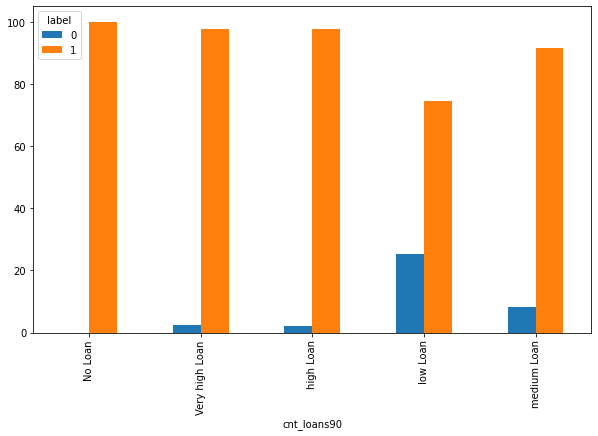

In [143]:
label_loans90.plot(kind='bar',figsize=(10,6))
plt.show()

We see a similar trend where in people with low loans tend to default the payments the most.

#### Number of times main account got recharged in last 30 days : cnt_ma_rech30

In [144]:
df['cnt_ma_rech30'].describe()

count    184410.000000
mean          3.681633
std           3.918442
min           0.000000
25%           1.000000
50%           3.000000
75%           5.000000
max         203.000000
Name: cnt_ma_rech30, dtype: float64

In [145]:
low_reach30 = df[df['cnt_ma_rech30']<=1].index

In [146]:
medium_reach30 = df[df['cnt_ma_rech30']>=2]
medium_reach30 = medium_reach30[medium_reach30['cnt_ma_rech30']<=5]
medium_reach30 = medium_reach30.index

In [147]:
high_reach30 = df[df['cnt_ma_rech30']>=6]
high_reach30 = high_reach30[high_reach30['cnt_ma_rech30']<=12]
high_reach30 = high_reach30.index

In [148]:
very_high_reach30 = df[df['cnt_ma_rech30']>=13].index

In [149]:
for i in low_reach30:
    df['cnt_ma_rech30'][i] = 'low recharge'

In [150]:
for i in medium_reach30:
    df['cnt_ma_rech30'][i] = 'medium recharge'

In [151]:
for i in high_reach30:
    df['cnt_ma_rech30'][i] = 'high recharge'

In [152]:
for i in very_high_reach30:
    df['cnt_ma_rech30'][i] = 'very high recharge'

In [153]:
label_reach30 = pd.crosstab(df['label'],df['cnt_ma_rech30']).apply(lambda x: x/x.sum() * 100)
label_reach30 = label_reach30.transpose()
label_reach30

label,0,1
cnt_ma_rech30,,
high recharge,2.422206,97.577794
low recharge,28.392781,71.607219
medium recharge,7.398262,92.601738
very high recharge,1.480638,98.519362


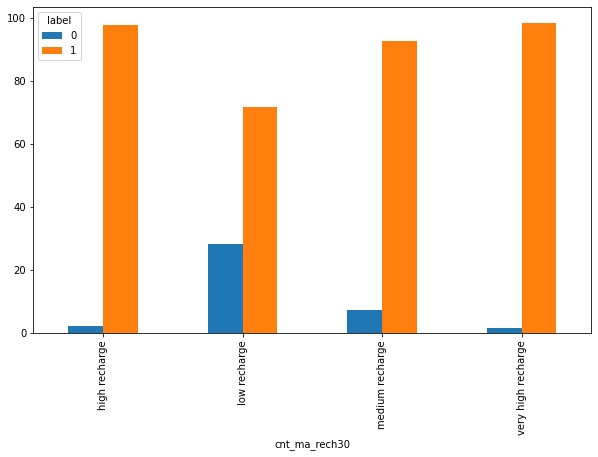

In [154]:
label_reach30.plot(kind='bar',figsize=(10,6))
plt.show()

From above, we see that the people who recharge less are the once who default the payments the most.

#### Number of times main account got recharged in last 90 days : cnt_ma_rech90

In [155]:
df['cnt_ma_rech90'].describe()

count    184410.000000
mean          5.824885
std           6.569662
min           0.000000
25%           2.000000
50%           4.000000
75%           8.000000
max         336.000000
Name: cnt_ma_rech90, dtype: float64

In [156]:
low_reach90 = df[df['cnt_ma_rech90']<=1]
low_reach90 = low_reach90.index

In [157]:
medium_reach90 = df[df['cnt_ma_rech90']>=2]
medium_reach90 = medium_reach90[medium_reach90['cnt_ma_rech90']<=8]
medium_reach90 = medium_reach90.index

In [158]:
high_reach90 = df[df['cnt_ma_rech90']>=9]
high_reach90 = high_reach90[high_reach90['cnt_ma_rech90']<=16]
high_reach90 = high_reach90.index

In [159]:
very_high_reach90 = df[df['cnt_ma_rech90']>=17]
very_high_reach90 = very_high_reach90.index

In [160]:
for i in low_reach90:
    df['cnt_ma_rech90'][i] = 'low recharge'

In [161]:
for i in medium_reach90:
    df['cnt_ma_rech90'][i] = 'medium recharge'

In [162]:
for i in high_reach90:
    df['cnt_ma_rech90'][i] = 'high recharge'

In [163]:
for i in very_high_reach90:
    df['cnt_ma_rech90'][i] = 'very high recharge'

In [164]:
label_reach90 = pd.crosstab(df['label'],df['cnt_ma_rech90']).apply(lambda x: x/x.sum() * 100)
label_reach90 = label_reach90.transpose()
label_reach90

label,0,1
cnt_ma_rech90,,
high recharge,2.064877,97.935123
low recharge,33.439688,66.560312
medium recharge,8.671116,91.328884
very high recharge,0.862143,99.137857


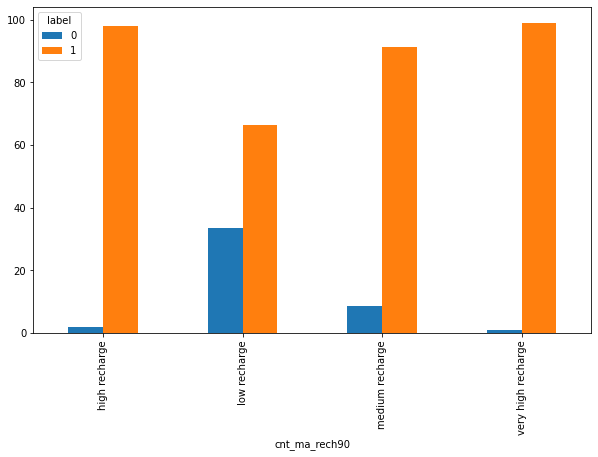

In [165]:
label_reach90.plot(kind='bar',figsize=(10,6))
plt.show()

We see a similar trend, where in people who recharge less tend to default the most.

#### Number of times data account got recharged in last 30 days : cnt_da_rech30

In [166]:
df['cnt_da_rech30'].describe()

count    184410.000000
mean        263.526991
std        4197.858216
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       99914.441420
Name: cnt_da_rech30, dtype: float64

We see some unrealistic values in the column, were in the data is for 30 days. In 30 days, we have 30*24 = 720 hrs. Considering a person recharges every 5 mins 24hrs a day  = 30*24*12, we still get a threshold = 8640. We do have values in the column which are way above the threshold.

In [167]:
len(df[df['cnt_da_rech30']>8640])

897

From above, we see that there are 873 values which seem unrealistic and hence we could either drop them or impute then with mean median or median. Since deleting the rows would lead to data loss, we impute then with median.

In [168]:
high_cnt_da_rech30 = df[df['cnt_da_rech30']>8641]
high_cnt_da_rech30 = high_cnt_da_rech30.index

In [169]:
for i in high_cnt_da_rech30:
    df['cnt_da_rech30'][i] = df['cnt_da_rech30'].median()

In [170]:
df['cnt_da_rech30'].describe()

count    184410.000000
mean          0.805051
std          72.278365
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        8608.530149
Name: cnt_da_rech30, dtype: float64

In [171]:
zero = df[df['cnt_da_rech30']==0].index

In [172]:
less_than_5 = df[df['cnt_da_rech30']>0]
less_than_5 = less_than_5[less_than_5['cnt_da_rech30']<=5]
less_than_5 = less_than_5.index

In [173]:
more_than_5 = df[df['cnt_da_rech30']>5]
more_than_5 = more_than_5.index

In [174]:
for i in zero:
    df['cnt_da_rech30'][i] = 'no recharge'

In [175]:
for i in less_than_5:
    df['cnt_da_rech30'][i] = 'less than 5 recharges'

In [176]:
for i in more_than_5:
    df['cnt_da_rech30'][i] = 'more than 5 recharges'

In [177]:
label_cnt_da_rech30 = pd.crosstab(df['label'],df['cnt_da_rech30']).apply(lambda x: x/x.sum() * 100)
label_cnt_da_rech30 = label_cnt_da_rech30.transpose()
label_cnt_da_rech30

label,0,1
cnt_da_rech30,,
less than 5 recharges,10.685034,89.314966
more than 5 recharges,16.326531,83.673469
no recharge,13.213417,86.786583


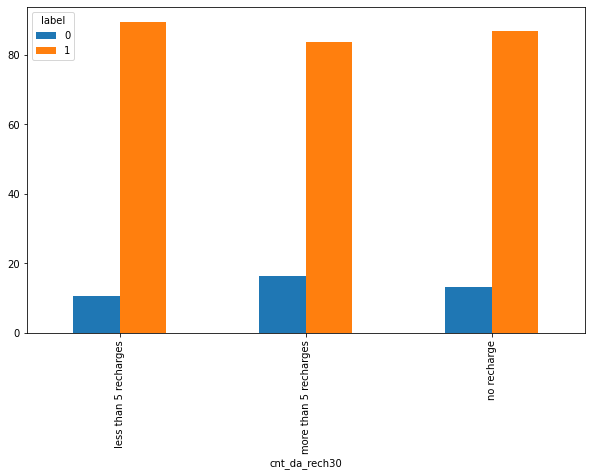

In [178]:
label_cnt_da_rech30.plot(kind='bar',figsize=(10,6))
plt.show()

We see people with more than 5 recharges tend to defaul the most.

#### Number of times data account got recharged in last 90 days : cnt_da_rech90

In [179]:
df['cnt_da_rech90'].describe()

count    184410.000000
mean          0.041907
std           0.400980
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          38.000000
Name: cnt_da_rech90, dtype: float64

In [180]:
zero = df[df['cnt_da_rech90']==0].index

In [181]:
less_than_5 = df[df['cnt_da_rech90']>0]
less_than_5 = less_than_5[less_than_5['cnt_da_rech90']<=5]
less_than_5 = less_than_5.index

In [182]:
more_than_5 = df[df['cnt_da_rech90']>5]
more_than_5 = more_than_5.index

In [183]:
for i in zero:
    df['cnt_da_rech90'][i] = 'no recharge'

In [184]:
for i in less_than_5:
    df['cnt_da_rech90'][i] = 'less than 5 recharges'

In [185]:
for i in more_than_5:
    df['cnt_da_rech90'][i] = 'more than 5 recharges'

In [186]:
label_cnt_da_rech90 = pd.crosstab(df['label'],df['cnt_da_rech90']).apply(lambda x: x/x.sum() * 100)
label_cnt_da_rech90 = label_cnt_da_rech90.transpose()
label_cnt_da_rech90

label,0,1
cnt_da_rech90,,
less than 5 recharges,9.044149,90.955851
more than 5 recharges,18.633540,81.366460
no recharge,13.280767,86.719233


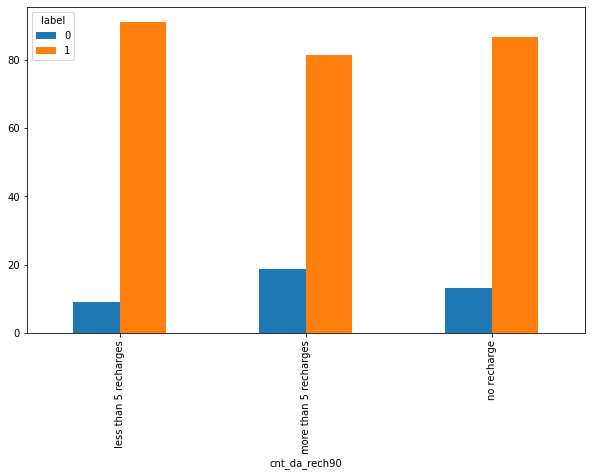

In [187]:
label_cnt_da_rech90.plot(kind='bar',figsize=(10,6))
plt.show()

We see a similar trend where in peopel with more than 5 recharges are the once who default the payments the most.

#### maximum amount of loan taken by the user in last 30 days : maxamnt_loans30

In [188]:
df['maxamnt_loans90'].value_counts()

6     159376
12     23007
0       2027
Name: maxamnt_loans90, dtype: int64

In [189]:
df['maxamnt_loans30'].value_counts()

6.000000        157745
12.000000        22580
0.000000          3173
30795.349649         1
68153.767618         1
                 ...  
12375.986576         1
25213.000065         1
58602.216988         1
60700.816765         1
96927.243252         1
Name: maxamnt_loans30, Length: 915, dtype: int64

We see that the max loan taken by the user is between 0-12 in maxamnt_loans90 and in maxamnt_loans30 the max value of the loan exceeds 12 which is not possible.

In [190]:
len(df[df['maxamnt_loans30']>12])

912

To avoid the data loss, lets impute these values with the median.

In [191]:
df['maxamnt_loans30'].median()

6.0

In [192]:
high_maxamt = df[df['maxamnt_loans30']>12]
high_maxamt = high_maxamt.index

In [193]:
for i in high_maxamt:
    df['maxamnt_loans30'][i] = 6.0

In [194]:
df['maxamnt_loans30'] = df['maxamnt_loans30'].replace([0.0,6.0,12.0],['no loan','medium loan','high loan'])

In [195]:
label_maxamnt_loan30 = pd.crosstab(df['label'],df['maxamnt_loans30']).apply(lambda x: x/x.sum()*100)
label_maxamnt_loan30 = label_maxamnt_loan30.transpose()
label_maxamnt_loan30

label,0,1
maxamnt_loans30,,
high loan,4.331267,95.668733
medium loan,14.700896,85.299104
no loan,0.000000,100.000000


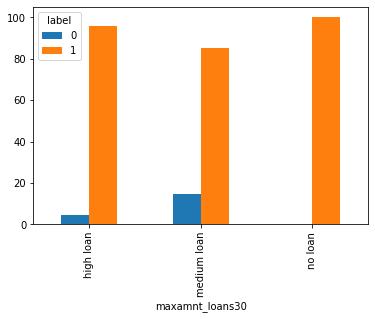

In [196]:
label_maxamnt_loan30.plot(kind='bar')
plt.show()

From above, we see that the customers who take medium loans are the once, who defaul the payments most and people who do not take a loan do not default the paymnets.

#### maximum amount of loan taken by the user in last 90 days : maxamnt_loans90

In [197]:
df['maxamnt_loans90'].value_counts()

6     159376
12     23007
0       2027
Name: maxamnt_loans90, dtype: int64

In [198]:
df['maxamnt_loans30'] = df['maxamnt_loans30'].replace([0,6,12],['no loan','medium loan','high loan'])

In [199]:
label_maxamnt_loan30 = pd.crosstab(df['label'],df['maxamnt_loans30']).apply(lambda x: x/x.sum()*100)
label_maxamnt_loan30 = label_maxamnt_loan30.transpose()
label_maxamnt_loan30

label,0,1
maxamnt_loans30,,
high loan,4.331267,95.668733
medium loan,14.700896,85.299104
no loan,0.000000,100.000000


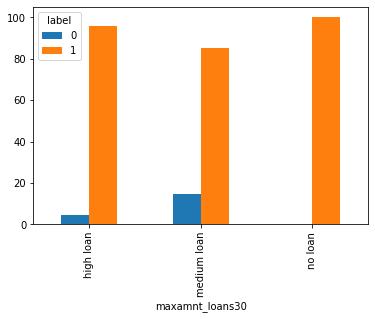

In [200]:
label_maxamnt_loan30.plot(kind='bar')
plt.show()

We see a similar trend where medium loan takers default the payments the most and people with no loans do not.

#### Average payback time in days over last 90 days: payback90

In [201]:
df['payback90'].describe()

count    184410.000000
mean          4.369995
std          10.662782
min           0.000000
25%           0.000000
50%           1.333333
75%           4.500000
max         171.500000
Name: payback90, dtype: float64

In [202]:
zero = df[df['payback90']==0]
zero = zero.index

In [203]:
less_5 = df[df['payback90']>=1.0]
less_5 = less_5[less_5['payback90']<=5]
less_5 = less_5.index

In [204]:
less_10 = df[df['payback90']>5]
less_10 = less_10[less_10['payback90']<=10]
less_10 = less_10.index

In [205]:
less_15 = df[df['payback90']> 10]
less_15 = less_15[less_15['payback90']<=15]
less_15 = less_15.index

In [206]:
less_20 = df[df['payback90']>15]
less_20 = less_20[less_20['payback90']<=20]
less_20 = less_20.index

In [207]:
more = df[df['payback90']>20]
more = more.index

In [208]:
for i in zero:
    df['payback90'][i] = 'no loan/not paid yet'

In [209]:
for i in less_5:
    df['payback90'][i] = 'paid in 1-5 days'

In [210]:
for i in less_10:
    df['payback90'][i] = 'paid in 6-10 days'

In [211]:
for i in less_15:
    df['payback90'][i] = 'paid in 11-15 days'

In [212]:
for i in less_20:
    df['payback90'][i] = 'paid in 16-20 days'

In [213]:
for i in more:
    df['payback90'][i] = 'paid in more than 20 days'

In [214]:
label_payback90 = pd.crosstab(df['label'],df['payback90']).apply(lambda x: x/x.sum()*100)
label_payback90 = label_payback90.transpose()
label_payback90

label,0,1
payback90,,
no loan/not paid yet,22.489866,77.510134
paid in 1-5 days,2.004278,97.995722
paid in 11-15 days,8.413967,91.586033
paid in 16-20 days,10.701707,89.298293
paid in 6-10 days,4.587615,95.412385
paid in more than 20 days,13.720722,86.279278


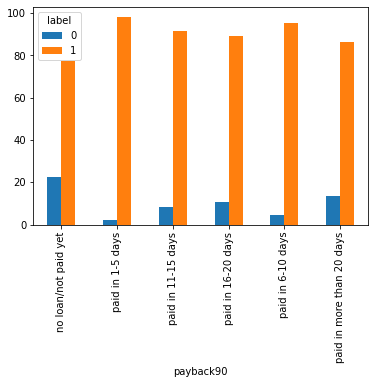

In [215]:
label_payback90.plot(kind='bar')
plt.show()

#### Average payback time in days over last 30 days: payback30

In [216]:
df['payback30'].describe()

count    184410.000000
mean          3.384199
std           9.082153
min           0.000000
25%           0.000000
50%           0.000000
75%           3.666667
max         171.500000
Name: payback30, dtype: float64

In [217]:
zero = df[df['payback30']==0]
zero = zero.index

In [218]:
less_5 = df[df['payback30']>=1.0]
less_5 = less_5[less_5['payback30']<=5]
less_5 = less_5.index

In [219]:
less_10 = df[df['payback30']>5]
less_10 = less_10[less_10['payback30']<=10]
less_10 = less_10.index

In [220]:
less_15 = df[df['payback30']> 10]
less_15 = less_15[less_15['payback30']<=15]
less_15 = less_15.index

In [221]:
less_20 = df[df['payback30']>15]
less_20 = less_20[less_20['payback30']<=20]
less_20 = less_20.index

In [222]:
more = df[df['payback30']>20]
more = more.index

In [223]:
for i in zero:
    df['payback30'][i] = 'no loan/not paid yet'

In [224]:
for i in less_5:
    df['payback30'][i] = 'paid in 1-5 days'

In [225]:
for i in less_10:
    df['payback30'][i] = 'paid in 6-10 days'

In [226]:
for i in less_15:
    df['payback30'][i] = 'paid in 11-15 days'

In [227]:
for i in less_20:
    df['payback30'][i] = 'paid in 16-20 days'

In [228]:
for i in more:
    df['payback30'][i] = 'paid in more than 20 days'

In [229]:
df['payback30'].value_counts()

no loan/not paid yet         99817
paid in 1-5 days             52573
paid in 6-10 days            18632
paid in 11-15 days            5738
paid in more than 20 days     4999
paid in 16-20 days            2651
Name: payback30, dtype: int64

In [230]:
label_payback30 = pd.crosstab(df['label'],df['payback30']).apply(lambda x: x/x.sum()*100)
label_payback30 = label_payback30.transpose()
label_payback30

label,0,1
payback30,,
no loan/not paid yet,20.821103,79.178897
paid in 1-5 days,1.991517,98.008483
paid in 11-15 days,8.644127,91.355873
paid in 16-20 days,11.429649,88.570351
paid in 6-10 days,5.012881,94.987119
paid in more than 20 days,14.782957,85.217043


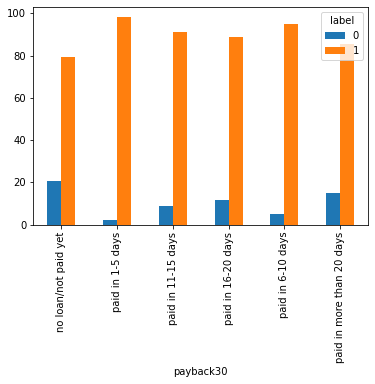

In [231]:
label_payback30.plot(kind='bar')
plt.show()

We see a similar trend where in 0 days or no loan/not paid yet contains the highes number of defaulters and paid in 1-5 the least.

#### Frequency of data account recharged in last 30 days :fr_da_rech30

In [232]:
df['fr_da_rech30'].describe()

count    184410.000000
mean       3783.701298
std       54194.914886
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      999809.240107
Name: fr_da_rech30, dtype: float64

In [233]:
len(df[df['fr_da_rech30']>0])

1385

#### Frequency of data account recharged in last 90 days :fr_da_rech90

In [234]:
df['fr_da_rech90'].describe()

count    184410.000000
mean          0.045599
std           0.950424
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          64.000000
Name: fr_da_rech90, dtype: float64

In [235]:
len(df[df['fr_da_rech90']>0])

749

From a above, we see that Frequency has less than 1% values which are not 0 and since we already have the count for the recharges, we could drop both the frequencies above.

In [236]:
df.drop(['fr_da_rech90','fr_da_rech30'],axis=1,inplace=True)

#### Median of amounts of loan taken by the user in last 30 days : medianamnt_loans30

In [237]:
df['medianamnt_loans30'].describe()

count    184410.000000
mean          0.056491
std           0.223356
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           3.000000
Name: medianamnt_loans30, dtype: float64

In [238]:
zero = df[df['medianamnt_loans30']==0].index

In [239]:
zero_1 = df[df['medianamnt_loans30']<=1]
zero_1 = zero_1[zero_1['medianamnt_loans30']>0]
zero_1 = zero_1.index

In [240]:
more_than_1 = df[df['medianamnt_loans30']>1].index

In [241]:
for i in zero:
    df['medianamnt_loans30'][i] = 'zero'

In [242]:
for i in zero_1:
    df['medianamnt_loans30'][i] = 'zero to one'

In [243]:
for i in more_than_1:
    df['medianamnt_loans30'][i] = 'greater than 1'

In [244]:
label_medianamnt_loans30 = pd.crosstab(df['label'],df['medianamnt_loans30']).apply(lambda x: x/x.sum()*100)
label_medianamnt_loans30 = label_medianamnt_loans30.transpose()
label_medianamnt_loans30

label,0,1
medianamnt_loans30,,
greater than 1,0.000000,100.000000
zero,13.628703,86.371297
zero to one,7.462209,92.537791


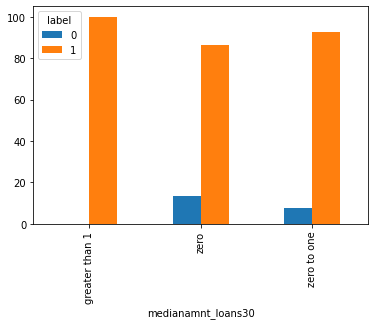

In [245]:
label_medianamnt_loans30.plot(kind='bar')
plt.show()

We see customers with their medianamnt_loans as 0 tend to default the payments the most.

#### Median of amounts of loan taken by the user in last 90 days : medianamnt_loans90

In [246]:
df['medianamnt_loans90'].describe()

count    184410.000000
mean          0.048571
std           0.206090
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           3.000000
Name: medianamnt_loans90, dtype: float64

In [247]:
zero = df[df['medianamnt_loans90']==0].index

In [248]:
zero_1 = df[df['medianamnt_loans90']<=1]
zero_1 = zero_1[zero_1['medianamnt_loans90']>0]
zero_1 = zero_1.index

In [249]:
more_than_1 = df[df['medianamnt_loans90']>1].index

In [250]:
for i in zero:
    df['medianamnt_loans90'][i] = 'zero'

In [251]:
for i in zero_1:
    df['medianamnt_loans90'][i] = 'zero to one'

In [252]:
for i in more_than_1:
    df['medianamnt_loans90'][i] = 'greater than 1'

In [253]:
label_medianamnt_loans90 = pd.crosstab(df['label'],df['medianamnt_loans90']).apply(lambda x: x/x.sum()*100)
label_medianamnt_loans90 = label_medianamnt_loans90.transpose()
label_medianamnt_loans90

label,0,1
medianamnt_loans90,,
greater than 1,0.000000,100.000000
zero,13.511047,86.488953
zero to one,8.282293,91.717707


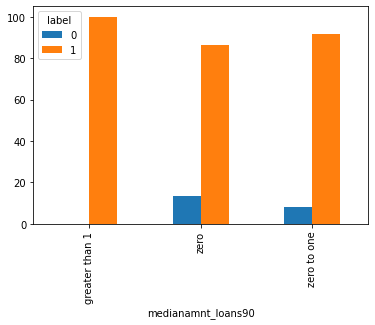

In [254]:
label_medianamnt_loans90.plot(kind='bar')
plt.show()

We see a similar trend, where in customers with medianamnt_loans90 as zero default the most.

### Checking Outliers

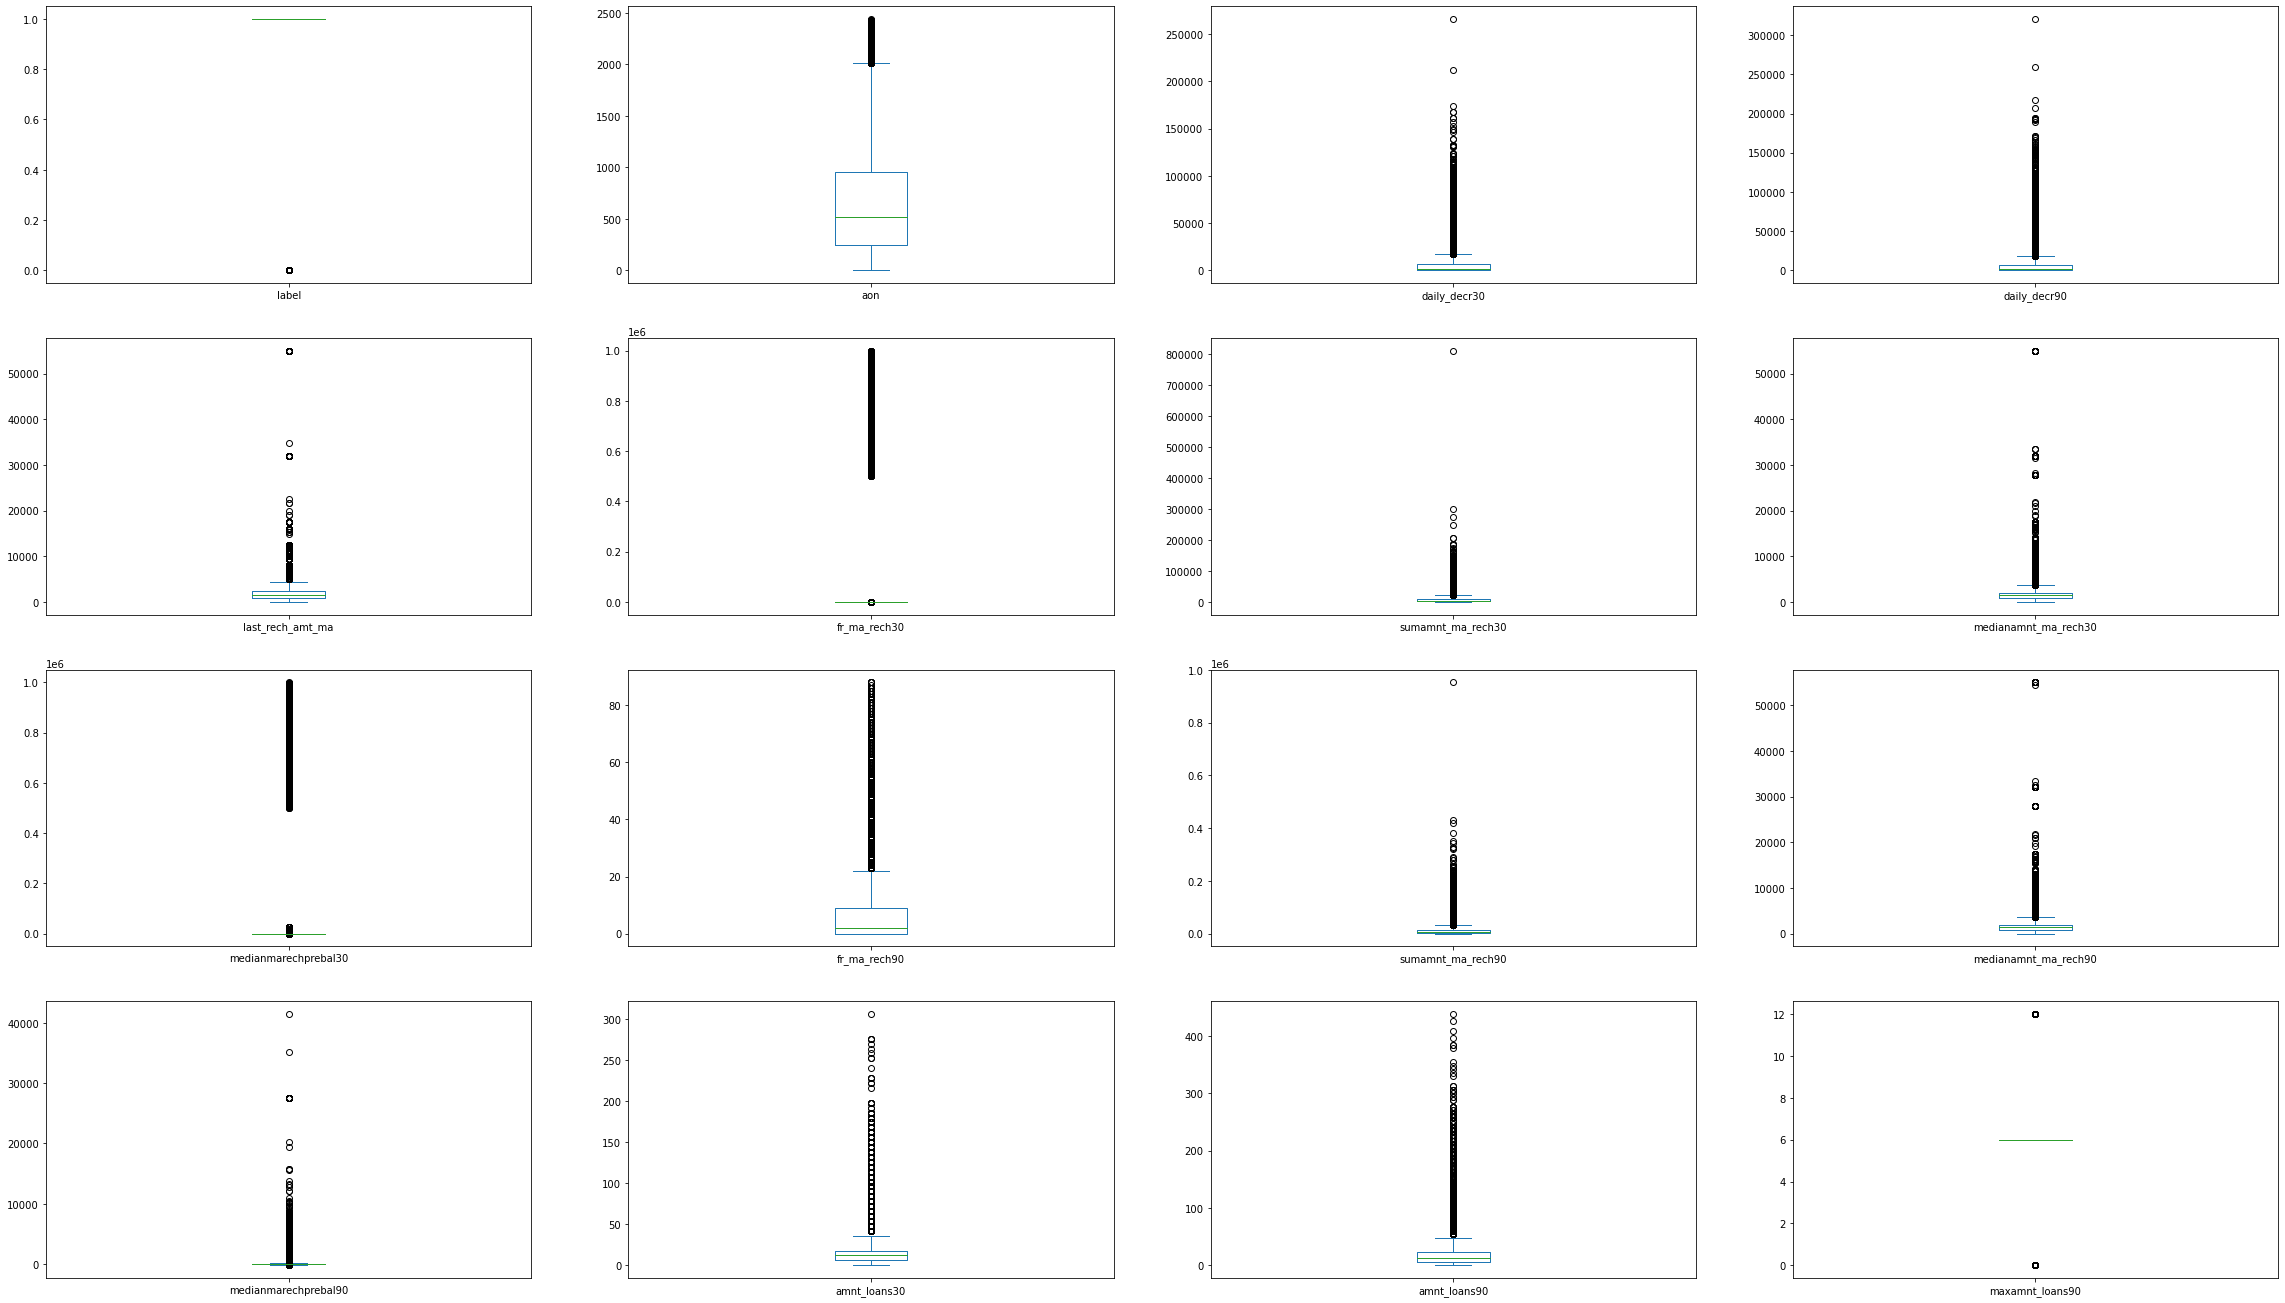

In [255]:
df.plot(kind='box',subplots=True,sharex=True,figsize=(40,60),layout=(10,4))
plt.show()

In [256]:
df.head(2)

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,cnt_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0,272.0,3055.05,3065.15,low balance,low balance,less than a week,less than a week,1539,medium recharge,21.0,3078.0,1539.0,7.50,medium recharge,21,3078,1539.0,7.50,no recharge,no recharge,medium loan,12,medium loan,zero,medium Loan,12,6,zero,paid in more than 20 days,paid in more than 20 days
1,1,712.0,12122.00,12124.75,good balance,good balance,less than a month,less than a week,5787,low recharge,0.0,5787.0,5787.0,61.04,low recharge,0,5787,5787.0,61.04,no recharge,no recharge,low loan,12,high loan,zero,low Loan,12,12,zero,no loan/not paid yet,no loan/not paid yet


In [257]:
df = pd.get_dummies(df,columns=['rental30','rental90','last_rech_date_ma','last_rech_date_da','cnt_ma_rech30','cnt_ma_rech90','cnt_da_rech30','cnt_da_rech90','cnt_loans30','maxamnt_loans30','medianamnt_loans30','cnt_loans90','medianamnt_loans90','payback30','payback90'])

#### Removing Outliers

Deleting outliers from the data would result in a huge data loss, hence we are going ahead with the median imputation of the outliers.

In [258]:
def removing_outliers(column):
    Q3 = df[column].quantile(0.75)
    Q1 = df[column].quantile(0.25)
    IQR = Q3-Q1
    upper_limit = Q3+(1.5*IQR)
    lower_limit = Q1-(1.5*IQR)
    print('For',column,'the upper limit is :',upper_limit,' and the lower limit is:',lower_limit)
    upper_outliers = df[df[column]>upper_limit]
    upper_outliers = upper_outliers.index
    lower_outliers = df[df[column]<lower_limit]
    lower_outliers = lower_outliers.index
    outlier = upper_outliers.append(lower_outliers)
    print('Number of outliers : ', len(outlier))
    median = df[column].median()
    for i in outlier:
        df[column][i] = median

In [259]:
removing_outliers('aon')

For aon the upper limit is : 2013.0  and the lower limit is: -811.0
Number of outliers :  2165


In [260]:
removing_outliers('daily_decr30')

For daily_decr30 the upper limit is : 16938.675125  and the lower limit is: -10097.791874999999
Number of outliers :  14596


In [261]:
removing_outliers('daily_decr90')

For daily_decr90 the upper limit is : 18250.6135  and the lower limit is: -10884.562499999998
Number of outliers :  16168


In [262]:
removing_outliers('last_rech_amt_ma')

For last_rech_amt_ma the upper limit is : 4617.5  and the lower limit is: -1538.5
Number of outliers :  19055


In [263]:
removing_outliers('fr_ma_rech30')

For fr_ma_rech30 the upper limit is : 15.0  and the lower limit is: -9.0
Number of outliers :  10554


In [264]:
removing_outliers('sumamnt_ma_rech30')

For sumamnt_ma_rech30 the upper limit is : 21277.5  and the lower limit is: -10302.5
Number of outliers :  11778


In [265]:
removing_outliers('medianamnt_ma_rech30')

For medianamnt_ma_rech30 the upper limit is : 3655.0  and the lower limit is: -961.0
Number of outliers :  22757


In [266]:
removing_outliers('medianmarechprebal30')

For medianmarechprebal30 the upper limit is : 193.75  and the lower limit is: -100.25
Number of outliers :  24162


In [267]:
removing_outliers('fr_ma_rech90')

For fr_ma_rech90 the upper limit is : 22.5  and the lower limit is: -13.5
Number of outliers :  22939


In [268]:
removing_outliers('sumamnt_ma_rech90')

For sumamnt_ma_rech90 the upper limit is : 34297.5  and the lower limit is: -16882.5
Number of outliers :  12406


In [269]:
removing_outliers('medianamnt_ma_rech90')

For medianamnt_ma_rech90 the upper limit is : 3650.5  and the lower limit is: -953.5
Number of outliers :  23367


In [270]:
removing_outliers('medianmarechprebal90')

For medianmarechprebal90 the upper limit is : 179.0  and the lower limit is: -85.0
Number of outliers :  22970


In [271]:
removing_outliers('amnt_loans30')

For amnt_loans30 the upper limit is : 36.0  and the lower limit is: -12.0
Number of outliers :  13907


In [272]:
removing_outliers('amnt_loans90')

For amnt_loans90 the upper limit is : 51.0  and the lower limit is: -21.0
Number of outliers :  16458


#### Checking skewness

In [273]:
cols = ['aon','amnt_loans90','amnt_loans30','medianmarechprebal90','medianamnt_ma_rech90','sumamnt_ma_rech90','fr_ma_rech90','medianmarechprebal30','medianamnt_ma_rech30','sumamnt_ma_rech30','fr_ma_rech30','last_rech_amt_ma','daily_decr90','daily_decr30']

In [274]:
for i in cols:
    print(i , df[i].skew())

aon 0.8878720408543314
amnt_loans90 1.2725166640499581
amnt_loans30 1.1066352200724785
medianmarechprebal90 1.3786052168810885
medianamnt_ma_rech90 0.3404251238058009
sumamnt_ma_rech90 1.2138975404003622
fr_ma_rech90 1.8646308832423546
medianmarechprebal30 1.5270161157343685
medianamnt_ma_rech30 0.2721283902327334
sumamnt_ma_rech30 1.101572290387949
fr_ma_rech30 1.3990465341780707
last_rech_amt_ma 1.0344976048629475
daily_decr90 1.6295408724191165
daily_decr30 1.5499681803777345


Distribution Plot For : aon


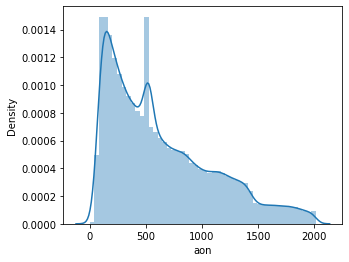

Distribution Plot For : amnt_loans90


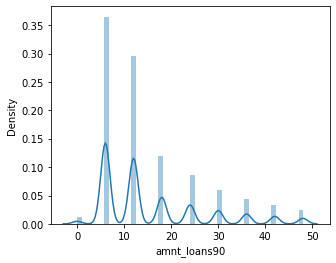

Distribution Plot For : amnt_loans30


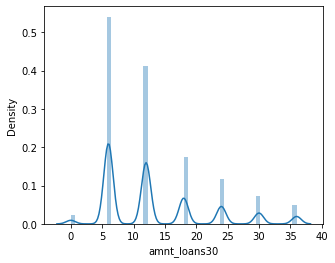

Distribution Plot For : medianmarechprebal90


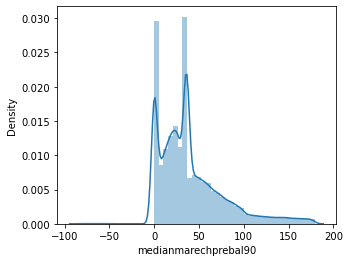

Distribution Plot For : medianamnt_ma_rech90


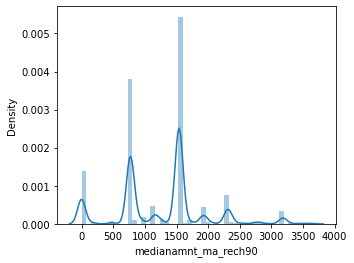

Distribution Plot For : sumamnt_ma_rech90


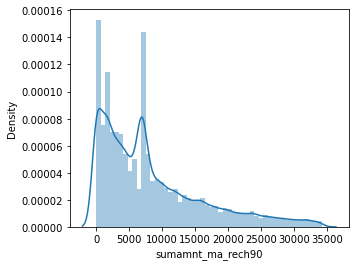

Distribution Plot For : fr_ma_rech90


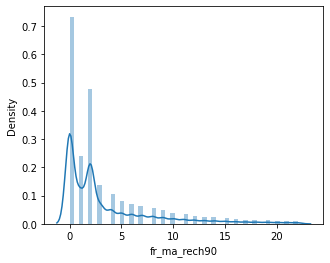

Distribution Plot For : medianmarechprebal30


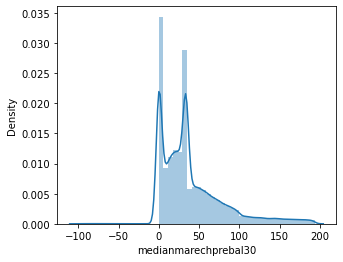

Distribution Plot For : medianamnt_ma_rech30


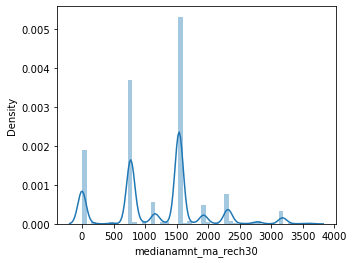

Distribution Plot For : sumamnt_ma_rech30


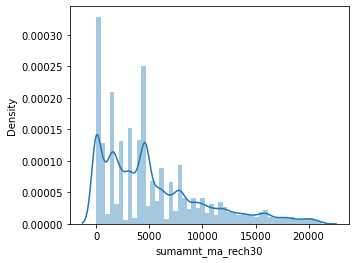

Distribution Plot For : fr_ma_rech30


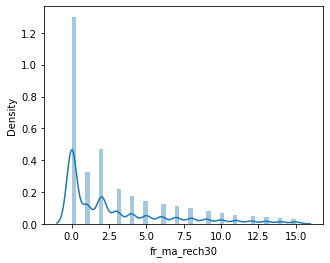

Distribution Plot For : last_rech_amt_ma


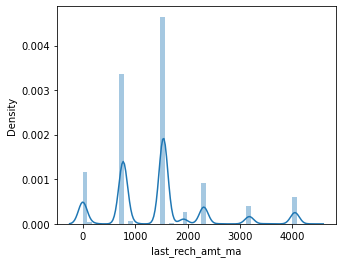

Distribution Plot For : daily_decr90


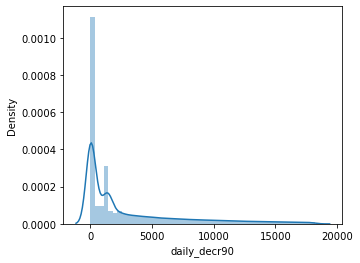

Distribution Plot For : daily_decr30


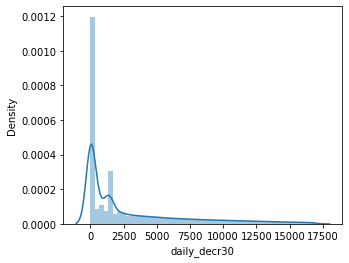

In [275]:
for i in cols:
    print('Distribution Plot For :',i)
    plt.figure(figsize=(5,4))
    sns.distplot(df[i])
    plt.show()

Lets set the skewness threshold to +/- 0.8, we see a higher skewness in all the columns other than medianamnt_ma_rech90 and medianamnt_ma_rech30.

#### Splitting the data into dependent variable and independent variable.

In [276]:
x = df.drop('label',axis=1)
x.shape

(184410, 84)

In [277]:
y = df['label']
y.shape

(184410,)

#### Removing Skewness

In [278]:
from sklearn.preprocessing import power_transform

In [279]:
X = power_transform(x)
X = pd.DataFrame(X,columns=x.columns)
X

,aon,daily_decr30,daily_decr90,last_rech_amt_ma,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,amnt_loans30,amnt_loans90,maxamnt_loans90,rental30_average balance,rental30_good balance,rental30_low balance,rental30_zero balance,rental90_average balance,rental90_good balance,rental90_low balance,rental90_zero balance,last_rech_date_ma_expired_fortnight,last_rech_date_ma_expired_month,last_rech_date_ma_expired_week,last_rech_date_ma_less than a fortnight,last_rech_date_ma_less than a month,last_rech_date_ma_less than a quarter,last_rech_date_ma_less than a week,last_rech_date_ma_more than a quarter,last_rech_date_da_expired_fortnight,last_rech_date_da_expired_month,last_rech_date_da_expired_week,last_rech_date_da_less than a fortnight,last_rech_date_da_less than a month,last_rech_date_da_less than a quarter,last_rech_date_da_less than a week,last_rech_date_da_more than a quarter,cnt_ma_rech30_high recharge,cnt_ma_rech30_low recharge,cnt_ma_rech30_medium recharge,cnt_ma_rech30_very high recharge,cnt_ma_rech90_high recharge,cnt_ma_rech90_low recharge,cnt_ma_rech90_medium recharge,cnt_ma_rech90_very high recharge,cnt_da_rech30_less than 5 recharges,cnt_da_rech30_more than 5 recharges,cnt_da_rech30_no recharge,cnt_da_rech90_less than 5 recharges,cnt_da_rech90_more than 5 recharges,cnt_da_rech90_no recharge,cnt_loans30_high loan,cnt_loans30_low loan,cnt_loans30_medium loan,cnt_loans30_no loan,cnt_loans30_very high loan,maxamnt_loans30_high loan,maxamnt_loans30_medium loan,maxamnt_loans30_no loan,medianamnt_loans30_greater than 1,medianamnt_loans30_zero,medianamnt_loans30_zero to one,cnt_loans90_No Loan,cnt_loans90_Very high Loan,cnt_loans90_high Loan,cnt_loans90_low Loan,cnt_loans90_medium Loan,medianamnt_loans90_greater than 1,medianamnt_loans90_zero,medianamnt_loans90_zero to one,payback30_no loan/not paid yet,payback30_paid in 1-5 days,payback30_paid in 11-15 days,payback30_paid in 16-20 days,payback30_paid in 6-10 days,payback30_paid in more than 20 days,payback90_no loan/not paid yet,payback90_paid in 1-5 days,payback90_paid in 11-15 days,payback90_paid in 16-20 days,payback90_paid in 6-10 days,payback90_paid in more than 20 days
0,-0.704410,0.675423,0.668550,0.301099,0.283169,-0.099417,0.507853,-0.794382,1.887033,-0.415444,0.462014,-0.912481,0.091422,-0.055898,-0.277148,-0.998385,-0.575317,2.069772,-0.259027,-0.927505,-0.651925,2.145965,-0.254661,-0.023409,-0.071272,-0.023293,-0.391127,-0.284628,-0.192388,0.576912,-0.015967,-0.004033,-0.005207,-0.004657,-0.06845,-0.088309,-0.105843,0.161065,-0.041758,-0.477374,-0.699734,1.100222,-0.18568,-0.438032,-0.569247,0.939089,-0.259074,-0.121576,-0.023059,0.123807,-0.161118,-0.02956,0.163948,-0.522473,-0.858123,1.398943,-0.132634,-0.077747,-0.373536,0.402888,-0.132316,-0.048793,0.274721,-0.269687,-0.105239,-0.186631,-0.498381,-0.774411,1.273180,-0.040969,0.254866,-0.251117,-1.086263,-0.631485,-0.179206,-0.120769,-0.335248,5.990774,-0.971577,-0.645462,-0.200561,-0.142912,-0.367991,4.754258
1,0.434571,1.420912,1.398556,0.301099,-1.111658,0.405240,0.507853,0.619197,-1.228211,0.026811,0.462014,0.630609,0.091422,-0.055898,2.340309,-0.998385,1.738171,-0.483145,-0.259027,-0.927505,1.533920,-0.465991,-0.254661,-0.023409,-0.071272,-0.023293,-0.391127,3.513361,-0.192388,-1.733367,-0.015967,-0.004033,-0.005207,-0.004657,-0.06845,-0.088309,-0.105843,0.161065,-0.041758,-0.477374,1.429114,-0.908907,-0.18568,-0.438032,1.756706,-1.064862,-0.259074,-0.121576,-0.023059,0.123807,-0.161118,-0.02956,0.163948,-0.522473,1.165334,-0.714825,-0.132634,-0.077747,2.677118,-2.482080,-0.132316,-0.048793,0.274721,-0.269687,-0.105239,-0.186631,-0.498381,1.291304,-0.785435,-0.040969,0.254866,-0.251117,0.920587,-0.631485,-0.179206,-0.120769,-0.335248,-0.166923,1.029255,-0.645462,-0.200561,-0.142912,-0.367991,-0.210338
2,0.068036,0.307496,0.304039,0.301099,-1.111658,-0.532916,0.507853,0.736181,-1.228211,-0.796779,0.462014,0.7

In [280]:
for i in cols:
    print(i , X[i].skew())

aon -0.056943048689625415
amnt_loans90 0.009923174301031179
amnt_loans30 0.02976877099630559
medianmarechprebal90 -0.290139076824428
medianamnt_ma_rech90 -0.6520328134415279
sumamnt_ma_rech90 -0.38753538205320237
fr_ma_rech90 0.09440505876134599
medianmarechprebal30 -0.45579441249906744
medianamnt_ma_rech30 -0.7933627286551288
sumamnt_ma_rech30 -0.5020140763259541
fr_ma_rech30 0.1283134766385507
last_rech_amt_ma -0.4292409461017867
daily_decr90 -0.14906194977721585
daily_decr30 -0.157061857553374


We see that the skewness in within the threshold.

In [281]:
#### Checking Correlations

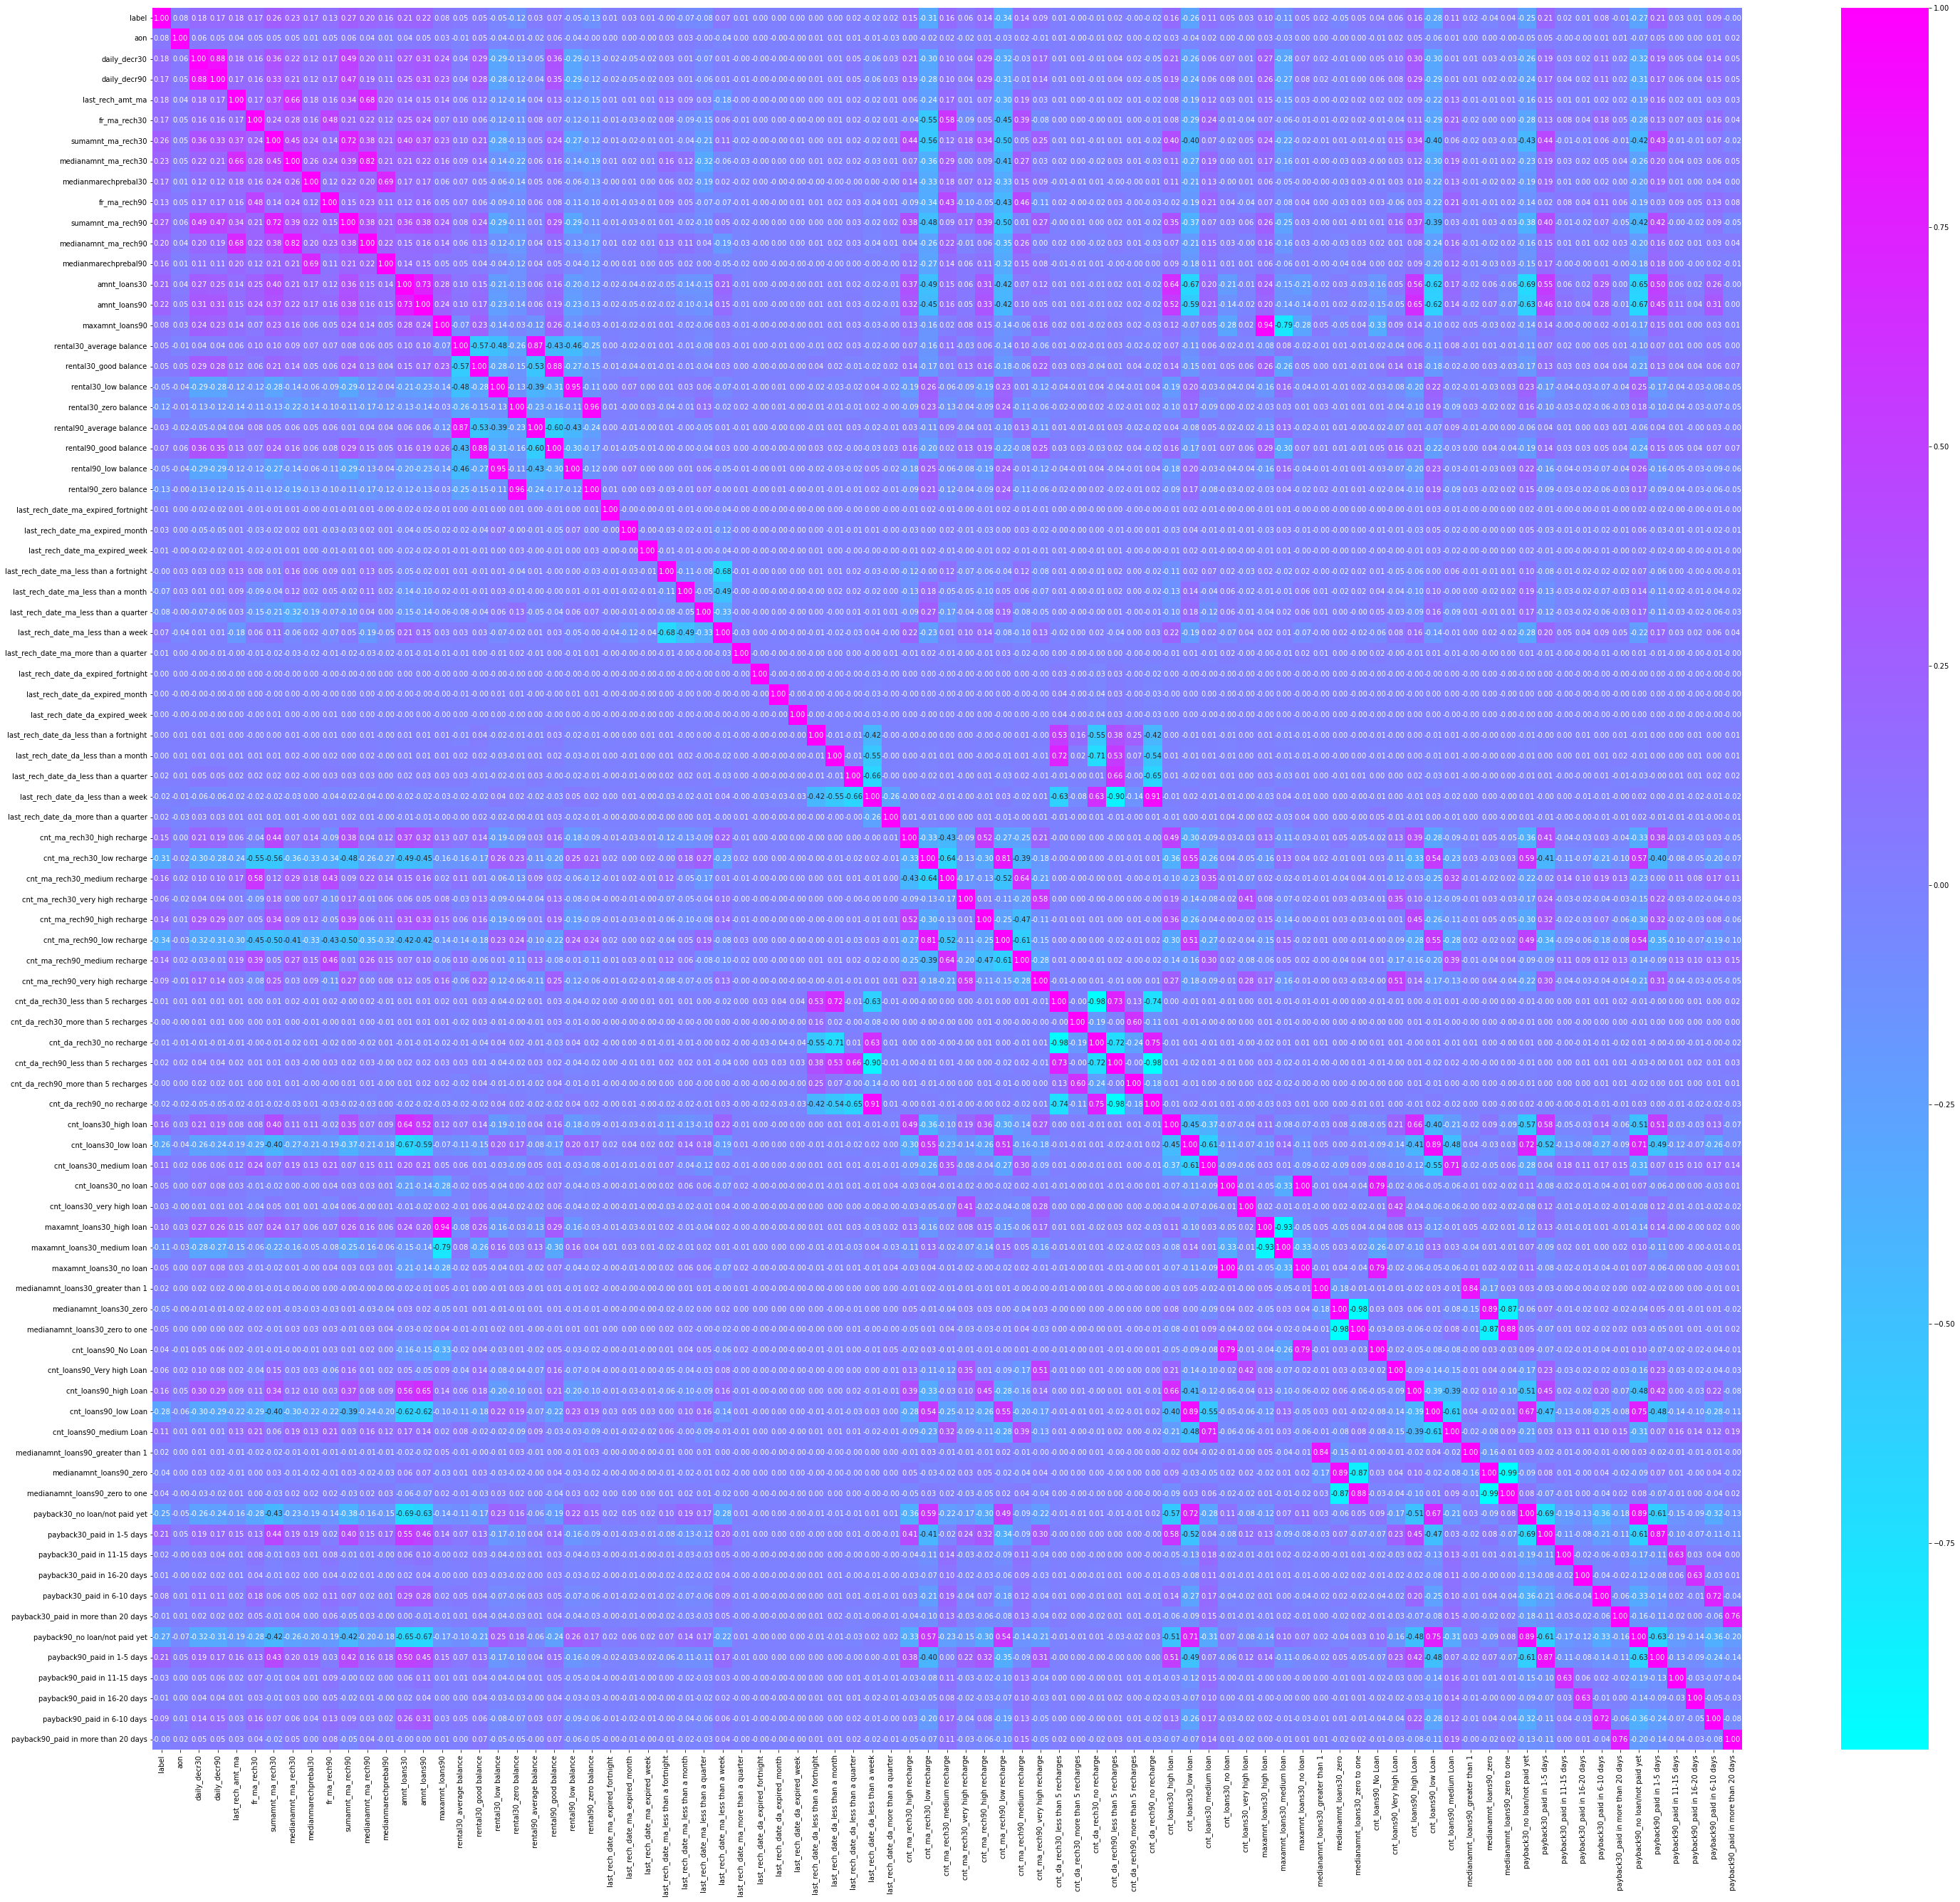

In [282]:
plt.figure(figsize=(50,45))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='cool')
plt.show()

We see a strong correlaton between a lot of features from above, we would go ahead with dimentionality reduction technique PCA to reduce multicolinearity and reduce the dimensions as well.

#### Balancing the data

In [283]:
from imblearn.over_sampling import SMOTE

In [284]:
sm = SMOTE()
X,y = sm.fit_resample(X,y)
X.shape,y.shape

((320216, 84), (320216,))

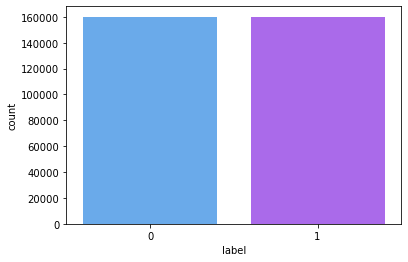

In [285]:
sns.countplot(y,palette='cool')
plt.show()

#### Scalling the data

In [286]:
from sklearn.preprocessing import StandardScaler

In [287]:
sc=StandardScaler()
X = sc.fit_transform(X)
X = pd.DataFrame(X,columns=x.columns)
X

,aon,daily_decr30,daily_decr90,last_rech_amt_ma,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,amnt_loans30,amnt_loans90,maxamnt_loans90,rental30_average balance,rental30_good balance,rental30_low balance,rental30_zero balance,rental90_average balance,rental90_good balance,rental90_low balance,rental90_zero balance,last_rech_date_ma_expired_fortnight,last_rech_date_ma_expired_month,last_rech_date_ma_expired_week,last_rech_date_ma_less than a fortnight,last_rech_date_ma_less than a month,last_rech_date_ma_less than a quarter,last_rech_date_ma_less than a week,last_rech_date_ma_more than a quarter,last_rech_date_da_expired_fortnight,last_rech_date_da_expired_month,last_rech_date_da_expired_week,last_rech_date_da_less than a fortnight,last_rech_date_da_less than a month,last_rech_date_da_less than a quarter,last_rech_date_da_less than a week,last_rech_date_da_more than a quarter,cnt_ma_rech30_high recharge,cnt_ma_rech30_low recharge,cnt_ma_rech30_medium recharge,cnt_ma_rech30_very high recharge,cnt_ma_rech90_high recharge,cnt_ma_rech90_low recharge,cnt_ma_rech90_medium recharge,cnt_ma_rech90_very high recharge,cnt_da_rech30_less than 5 recharges,cnt_da_rech30_more than 5 recharges,cnt_da_rech30_no recharge,cnt_da_rech90_less than 5 recharges,cnt_da_rech90_more than 5 recharges,cnt_da_rech90_no recharge,cnt_loans30_high loan,cnt_loans30_low loan,cnt_loans30_medium loan,cnt_loans30_no loan,cnt_loans30_very high loan,maxamnt_loans30_high loan,maxamnt_loans30_medium loan,maxamnt_loans30_no loan,medianamnt_loans30_greater than 1,medianamnt_loans30_zero,medianamnt_loans30_zero to one,cnt_loans90_No Loan,cnt_loans90_Very high Loan,cnt_loans90_high Loan,cnt_loans90_low Loan,cnt_loans90_medium Loan,medianamnt_loans90_greater than 1,medianamnt_loans90_zero,medianamnt_loans90_zero to one,payback30_no loan/not paid yet,payback30_paid in 1-5 days,payback30_paid in 11-15 days,payback30_paid in 16-20 days,payback30_paid in 6-10 days,payback30_paid in more than 20 days,payback90_no loan/not paid yet,payback90_paid in 1-5 days,payback90_paid in 11-15 days,payback90_paid in 16-20 days,payback90_paid in 6-10 days,payback90_paid in more than 20 days
0,-0.605828,0.900025,0.892651,0.503024,0.553323,0.258928,0.704942,-0.610540,2.106830,-0.022364,0.638573,-0.722135,0.355219,0.215529,-0.243907,-0.950253,-0.537985,1.946403,-0.321917,-0.900355,-0.597974,2.012300,-0.320088,-0.017763,-0.055463,-0.017996,-0.391304,-0.322469,-0.234217,0.627735,-0.012116,-0.003061,-0.003952,-0.003534,-0.066136,-0.087155,-0.094797,0.149395,-0.031677,-0.371297,-0.979905,1.309515,-0.145588,-0.339182,-0.823986,1.095356,-0.198635,-0.116565,-0.024302,0.119139,-0.149349,-0.033121,0.153139,-0.405079,-1.145115,1.611335,-0.100279,-0.061152,-0.309084,0.327957,-0.100041,-0.037009,0.24334,-0.24017,-0.079676,-0.149625,-0.383728,-1.047980,1.457350,-0.031079,0.229971,-0.227636,-1.442164,-0.472498,-0.164178,-0.117837,-0.284105,5.825953,-1.313260,-0.481774,-0.183104,-0.137527,-0.30693,4.720998
1,0.538359,1.619979,1.597167,0.503024,-0.857352,0.730724,0.704942,0.849861,-0.957185,0.393033,0.638573,0.851661,0.355219,0.215529,2.909233,-0.950253,1.868556,-0.515460,-0.321917,-0.900355,1.681624,-0.498109,-0.320088,-0.017763,-0.055463,-0.017996,-0.391304,3.116504,-0.234217,-1.601140,-0.012116,-0.003061,-0.003952,-0.003534,-0.066136,-0.087155,-0.094797,0.149395,-0.031677,-0.371297,1.023311,-0.767546,-0.145588,-0.339182,1.216068,-0.916576,-0.198635,-0.116565,-0.024302,0.119139,-0.149349,-0.033121,0.153139,-0.405079,0.875611,-0.624016,-0.100279,-0.061152,3.248553,-3.060452,-0.100041,-0.037009,0.24334,-0.24017,-0.079676,-0.149625,-0.383728,0.956757,-0.689804,-0.031079,0.229971,-0.227636,0.694711,-0.472498,-0.164178,-0.117837,-0.284105,-0.171931,0.763362,-0.481774,-0.183104,-0.137527,-0.30693,-0.212381
2,0.170148,0.544700,0.540869,0.503024,-0.857352,-0.146342,0.704942,0.970720,-0.957185,-0.380541,0.638573,0.9812

#### PCA

In [288]:
from sklearn.decomposition import PCA
pca = PCA()

In [289]:
pca.fit(X)

PCA()

In [290]:
pca_x = pca.transform(X)

In [291]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum

array([0.16943264, 0.23207119, 0.28847583, 0.333316  , 0.377786  ,
       0.41451743, 0.44913219, 0.48100805, 0.50760539, 0.53147071,
       0.55493239, 0.57674542, 0.59848215, 0.62007376, 0.64110868,
       0.66152445, 0.68098553, 0.69871504, 0.71438419, 0.7298093 ,
       0.74357963, 0.75694794, 0.76954638, 0.78173692, 0.79385777,
       0.80576694, 0.81767256, 0.82957665, 0.84147913, 0.85337521,
       0.86522904, 0.87660575, 0.88761523, 0.8982441 , 0.90843669,
       0.91790758, 0.92588973, 0.93300367, 0.93884848, 0.94439815,
       0.94942799, 0.9538792 , 0.9582413 , 0.96224559, 0.96610407,
       0.96988911, 0.97289059, 0.97568622, 0.97829047, 0.98054281,
       0.98275421, 0.98486924, 0.98686819, 0.98875442, 0.99062188,
       0.9924243 , 0.99398686, 0.99526982, 0.99637326, 0.99733505,
       0.99796798, 0.99855885, 0.99911045, 0.99948602, 0.99969646,
       0.99980222, 0.99990253, 0.99997089, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

We see 99% of the data is being covered by 55 features hence we go ahead with n=55.

In [292]:
pca = PCA(n_components=55)
pca.fit(X)
X_pca = pd.DataFrame(pca.transform(X))
X_pca.shape

(320216, 55)

### Model Building

In [293]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [294]:
max_accuracy = 0
max_random_state = 0
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(X_pca,y,test_size=0.3,random_state=i)
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    accuracy = accuracy_score(y_test,pred)
    if accuracy>max_accuracy:
        max_accuracy=accuracy
        max_random_state=i
print('The best accuracy is ', max_accuracy ,'for random_state', max_random_state)

The best accuracy is  0.7643054182064227 for random_state 88


In [296]:
lr = LogisticRegression()
x_train,x_test,y_train,y_test = train_test_split(X_pca,y,test_size=0.3,random_state=88)
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
accuracy = accuracy_score(y_test,pred)
print('Base Model Report :',lr)
print('Accuracy Score',accuracy)
print(classification_report(y_test,pred))

Base Model Report : LogisticRegression()
Accuracy Score 0.7643054182064227
              precision    recall  f1-score   support

           0       0.75      0.80      0.77     48249
           1       0.78      0.73      0.75     47816

    accuracy                           0.76     96065
   macro avg       0.77      0.76      0.76     96065
weighted avg       0.77      0.76      0.76     96065



In [297]:
from sklearn.model_selection import cross_val_score

In [299]:
for j in range(2,6):
    cv = cross_val_score(lr,X_pca,y,cv=j)
    cv_score = cv.mean()
    print('at',j,'cross validation score is',cv_score,'and the accuracy is',accuracy)

at 2 cross validation score is 0.761258025832563 and the accuracy is 0.7643054182064227
at 3 cross validation score is 0.7611580767129004 and the accuracy is 0.7643054182064227
at 4 cross validation score is 0.7611893222075099 and the accuracy is 0.7643054182064227
at 5 cross validation score is 0.7611237279386582 and the accuracy is 0.7643054182064227


2 cross folds give us the best cross-validation results.

In [300]:
def Model(model):
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,pred)*100
    cv = cross_val_score(model,X_pca,y,cv=2)
    cv_score = cv.mean()*100
    print('Report for model', model)
    print('The Accuracy Score is', accuracy)
    print('Confussion Matrix :','\n',confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('Cross Validation Score is ', cv_score)
    print()
    print('Difference between accuracy score and cv is',accuracy-cv_score)

In [301]:
lr = LogisticRegression()
Model(lr)

Report for model LogisticRegression()
The Accuracy Score is 76.43054182064228
Confussion Matrix : 
 [[38580  9669]
 [12973 34843]]
              precision    recall  f1-score   support

           0       0.75      0.80      0.77     48249
           1       0.78      0.73      0.75     47816

    accuracy                           0.76     96065
   macro avg       0.77      0.76      0.76     96065
weighted avg       0.77      0.76      0.76     96065

Cross Validation Score is  76.1258025832563

Difference between accuracy score and cv is 0.30473923738597364


In [308]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
Model(knn)

Report for model KNeighborsClassifier()
The Accuracy Score is 86.3134336126581
Confussion Matrix : 
 [[46335  1914]
 [11234 36582]]
              precision    recall  f1-score   support

           0       0.80      0.96      0.88     48249
           1       0.95      0.77      0.85     47816

    accuracy                           0.86     96065
   macro avg       0.88      0.86      0.86     96065
weighted avg       0.88      0.86      0.86     96065

Cross Validation Score is  84.82399380418218

Difference between accuracy score and cv is 1.4894398084759217


In [303]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
Model(dtc)

Report for model DecisionTreeClassifier()
The Accuracy Score is 84.22005933482538
Confussion Matrix : 
 [[41649  6600]
 [ 8559 39257]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.85     48249
           1       0.86      0.82      0.84     47816

    accuracy                           0.84     96065
   macro avg       0.84      0.84      0.84     96065
weighted avg       0.84      0.84      0.84     96065

Cross Validation Score is  82.869063382217

Difference between accuracy score and cv is 1.350995952608372


In [304]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
Model(rf)

Report for model RandomForestClassifier()
The Accuracy Score is 91.18409410295114
Confussion Matrix : 
 [[44732  3517]
 [ 4952 42864]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.91     48249
           1       0.92      0.90      0.91     47816

    accuracy                           0.91     96065
   macro avg       0.91      0.91      0.91     96065
weighted avg       0.91      0.91      0.91     96065

Cross Validation Score is  89.77565143528119

Difference between accuracy score and cv is 1.408442667669945


In [305]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier()
Model(et)

Report for model ExtraTreesClassifier()
The Accuracy Score is 92.23130172279186
Confussion Matrix : 
 [[45259  2990]
 [ 4473 43343]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.92     48249
           1       0.94      0.91      0.92     47816

    accuracy                           0.92     96065
   macro avg       0.92      0.92      0.92     96065
weighted avg       0.92      0.92      0.92     96065

Cross Validation Score is  91.15690658805306

Difference between accuracy score and cv is 1.0743951347387934


In [306]:
from sklearn.ensemble import AdaBoostClassifier
ad = AdaBoostClassifier()
Model(ad)

Report for model AdaBoostClassifier()
The Accuracy Score is 76.70535574871181
Confussion Matrix : 
 [[38585  9664]
 [12714 35102]]
              precision    recall  f1-score   support

           0       0.75      0.80      0.78     48249
           1       0.78      0.73      0.76     47816

    accuracy                           0.77     96065
   macro avg       0.77      0.77      0.77     96065
weighted avg       0.77      0.77      0.77     96065

Cross Validation Score is  76.28507007769755

Difference between accuracy score and cv is 0.4202856710142555


In [307]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
Model(gb)

Report for model GradientBoostingClassifier()
The Accuracy Score is 78.12418674855567
Confussion Matrix : 
 [[38716  9533]
 [11482 36334]]
              precision    recall  f1-score   support

           0       0.77      0.80      0.79     48249
           1       0.79      0.76      0.78     47816

    accuracy                           0.78     96065
   macro avg       0.78      0.78      0.78     96065
weighted avg       0.78      0.78      0.78     96065

Cross Validation Score is  77.85276188572713

Difference between accuracy score and cv is 0.27142486282853895


In [302]:
import catboost as ctb
CBR = ctb.CatBoostClassifier()
Model(CBR)

Learning rate set to 0.1039
0:	learn: 0.6527879	total: 386ms	remaining: 6m 25s
1:	learn: 0.6242688	total: 525ms	remaining: 4m 21s
2:	learn: 0.5986855	total: 640ms	remaining: 3m 32s
3:	learn: 0.5795891	total: 754ms	remaining: 3m 7s
4:	learn: 0.5635414	total: 871ms	remaining: 2m 53s
5:	learn: 0.5514536	total: 986ms	remaining: 2m 43s
6:	learn: 0.5407234	total: 1.1s	remaining: 2m 35s
7:	learn: 0.5310833	total: 1.21s	remaining: 2m 29s
8:	learn: 0.5236642	total: 1.32s	remaining: 2m 25s
9:	learn: 0.5174624	total: 1.43s	remaining: 2m 21s
10:	learn: 0.5120941	total: 1.54s	remaining: 2m 18s
11:	learn: 0.5079668	total: 1.65s	remaining: 2m 16s
12:	learn: 0.5033063	total: 1.76s	remaining: 2m 14s
13:	learn: 0.4989764	total: 1.88s	remaining: 2m 12s
14:	learn: 0.4957546	total: 1.99s	remaining: 2m 10s
15:	learn: 0.4931426	total: 2.1s	remaining: 2m 9s
16:	learn: 0.4898018	total: 2.24s	remaining: 2m 9s
17:	learn: 0.4875677	total: 2.37s	remaining: 2m 9s
18:	learn: 0.4852162	total: 2.5s	remaining: 2m 8s
19

### HyperParameter Tuning

### ExtraTreesClassifier

In [339]:
from sklearn.model_selection import RandomizedSearchCV
et = ExtraTreesClassifier()
rv = RandomizedSearchCV

In [358]:
parameters = {'n_estimators':[90,100,105,110,120,150],'min_samples_split':[2,3,4],'min_samples_leaf':[1,2,4],'max_leaf_nodes':[None,4,5,7],'max_features':[25,30,35,40,45,50,55]}
rv = RandomizedSearchCV(et,parameters,cv=2,scoring='accuracy',n_jobs=-1)
rv.fit(x_train,y_train)
rv.best_params_

{'n_estimators': 100,
 'min_samples_split': 3,
 'min_samples_leaf': 2,
 'max_leaf_nodes': None,
 'max_features': 50}

In [359]:
rv.best_estimator_

ExtraTreesClassifier(max_features=50, min_samples_leaf=2, min_samples_split=3,
                     n_jobs=-1)

In [362]:
et = rv.best_estimator_
Model(et)

Report for model ExtraTreesClassifier(max_features=50, min_samples_leaf=2, min_samples_split=3,
                     n_jobs=-1)
The Accuracy Score is 92.06058397959714
Confussion Matrix : 
 [[45166  3083]
 [ 4544 43272]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.92     48249
           1       0.93      0.90      0.92     47816

    accuracy                           0.92     96065
   macro avg       0.92      0.92      0.92     96065
weighted avg       0.92      0.92      0.92     96065

Cross Validation Score is  90.91144727309066

Difference between accuracy score and cv is 1.1491367065064821


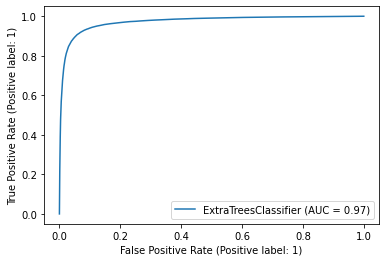

In [338]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(et,x_test,y_test)
plt.show()

### GradientBoostingClassifier

In [326]:
gb = GradientBoostingClassifier()
parameters = {'learning_rate':[1,0.1,0.5,0.01],'min_samples_split':[2,4,6],'max_depth':[3,5,7],'max_features':[None,25,35,45,55]}
rv = RandomizedSearchCV(gb,parameters,cv=2,scoring='accuracy',n_jobs=-1)
rv.fit(x_train,y_train)
rv.best_params_

{'min_samples_split': 2,
 'max_features': 55,
 'max_depth': 7,
 'learning_rate': 0.5}

In [327]:
rv.best_estimator_

GradientBoostingClassifier(learning_rate=0.5, max_depth=7, max_features=55)

In [330]:
gb = GradientBoostingClassifier(learning_rate=0.5, max_depth=7, max_features=55)
Model(gb)

Report for model GradientBoostingClassifier(learning_rate=0.5, max_depth=7, max_features=55)
The Accuracy Score is 84.98620725550408
Confussion Matrix : 
 [[42106  6143]
 [ 8280 39536]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.85     48249
           1       0.87      0.83      0.85     47816

    accuracy                           0.85     96065
   macro avg       0.85      0.85      0.85     96065
weighted avg       0.85      0.85      0.85     96065

Cross Validation Score is  84.05451320358758

Difference between accuracy score and cv is 0.9316940519165087


In [331]:
from sklearn.metrics import plot_roc_curve

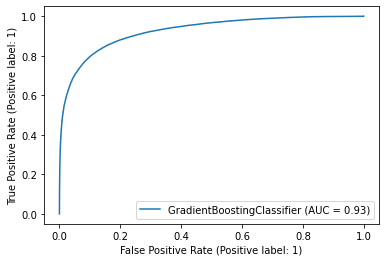

In [334]:
plot_roc_curve(gb,x_test,y_test)
plt.show()

### LogisticRegression

In [347]:
parameters = {'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],'C': [10**-2, 10**-1, 1],'penalty':['l1', 'l2', 'elasticnet', 'none']}

rv = RandomizedSearchCV(lr,parameters,cv=2,scoring='accuracy')
rv.fit(x_train,y_train)
rv.best_params_

{'solver': 'saga', 'penalty': 'l2', 'C': 1}

In [348]:
rv.best_estimator_

LogisticRegression(C=1, solver='saga')

In [349]:
lr = rv.best_estimator_
Model(lr)

Report for model LogisticRegression(C=1, solver='saga')
The Accuracy Score is 76.40347681257482
Confussion Matrix : 
 [[38578  9671]
 [12997 34819]]
              precision    recall  f1-score   support

           0       0.75      0.80      0.77     48249
           1       0.78      0.73      0.75     47816

    accuracy                           0.76     96065
   macro avg       0.77      0.76      0.76     96065
weighted avg       0.77      0.76      0.76     96065

Cross Validation Score is  76.11986908836535

Difference between accuracy score and cv is 0.28360772420947455


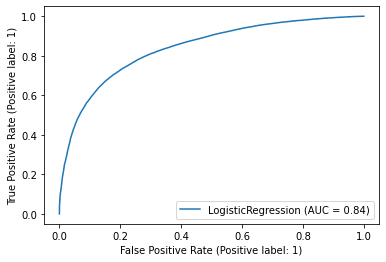

In [350]:
plot_roc_curve(lr,x_test,y_test)
plt.show()

### Final Model

From above, we see that the difference between the accuracy and cv is the least for LogisticRegression but the AUC Score for it is the least.
Hence, we choose ExtraTreesClassifier as our final model where in the difference between the accuracy and cv is higherby about 1% compared to LogisticRegression but it has the highest accuracy and the highest AUC Score. It also has the least false negative or type 2 error.

### Saving the Model

In [363]:
file_name = 'Micro_Credit.pkl'
import pickle
pickle.dump('et',open(file_name,'wb'))